# Importando bibliotecas

In [1]:
#------------------------------------------#
# CRIAR DIRETÓRIOS PARA DADOS E RESULTADOS #
#------------------------------------------#
from pathlib import Path
from os import listdir

#--------------------------------------#
# LISTAR E MANIPULAR ARQUIVOS DE DADOS #
#--------------------------------------#
import pandas as pd
import os.path
from os.path import isfile, join
import random
import numpy as np

#---------------------------------------------------#
# ANÁLISE DE DADOS - ALGORITMOS DE MACHINE LEARNING #
#---------------------------------------------------#

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, accuracy_score
import statsmodels.api as sm
import scipy.stats as stats
import math

# Regressão Linear
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.datasets import make_regression

# Árvore de Decisão
from sklearn.tree import DecisionTreeRegressor

# Floresta Aleatória
from sklearn.ensemble import RandomForestRegressor

#-----------------------#
# VISUALIZAÇÃO DE DADOS #
#-----------------------#
import seaborn as sns
import matplotlib.pyplot as plt

#-------------------#
# INTERFACE GRÁFICA #
#-------------------#
from PySimpleGUI import PySimpleGUI as sg

#-------------------#
# CONTROLE DE TEMPO #
#-------------------#
from datetime import datetime

#--------------------#
# IGNORANDO WARNINGS #
#--------------------#
# Durante o desenvolvimento do notebooks foram exibidos warnings a respeito
# de bibliotecas que serão alteradas futuramente (pandas)
import warnings
warnings.filterwarnings('ignore')

C:\Users\caroline.almuinha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\caroline.almuinha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Tempo de execução do notebook

In [2]:
# Iniciando contagem da duração dos downloads
start_time = datetime.now()

# Preparando dataframe

In [3]:
#----------------------------#
# LISTANDO ARQUIVOS DE DADOS #
#----------------------------#

#----------------------------------------------------------------#
# Varrendo diretório onde estão localizados os arquivos de dados #
#----------------------------------------------------------------#

# Definindo nome do diretório
path_ = Path.home() / "TCC/ArquivosDados"
path = str(path_) + '/'
path

# Listando os nomes dos arquivos
files = [f for f in listdir(path) if isfile(join(path, f))]

# Iniciando contador

counter = 0

# Criando dataframe vazio para receber nomes dos arquivos
concat_files = []

# Para cada arquivo encontrado no diretório, acrescentar os mesmos na variável "concat_files"
for counter in range(0, len(files)):
    concat_files.append(path + files[counter])
    counter = counter + 1

## Rótulos dos dados coletados

| Atributo | Descrição |
|:---|:---|
|Regiao - Sigla|Sigla da Região da revenda pesquisada|
|Estado - Sigla|Sigla da Unidade Federativa (UF) da revenda pesquisada|
|Municipio|Nome do município da revenda pesquisada|
|Revenda|Local que realiza a revenda de combustíveis|
|CNPJ da Revenda|Número do Cadastro Nacional de Pessoa Jurídica da revenda pesquisada|
|Nome da Rua|Nome do logradouro da revenda pesquisada|
|Numero Rua|Número do logradouro da revenda pesquisada|
|Complemento|Complemento do logradouro da revenda pesquisada|
|Bairro|Nome do bairro da revenda pesquisada|
|Cep|Número do Código do Endereço Postal (CEP) do logradouro da revenda pesquisada|
|Produto|Nome do combustível pesquisado|
|Data da Coleta|Data da coleta do(s) preço(s)|
|Valor de Venda|Preço de venda ao consumidor final praticado pelo revendedor, na data da coleta|
|Valor de Compra|Preço de distribuição (preço de venda da distribuidora para o posto revendedor de combustível - Série disponível até agosto de 2020)|
|Unidade de Medida|Unidade de Medida|
|Bandeira|Noma da Bandeira da revenda. <br> O Posto bandeirado é aquele que opta por exibir a marca comercial de um distribuidor, o posto deverá vender somente combustíveis <br> fornecidos pelo distribuidor detentor da marca comercial exibida aos consumidores. Já o Posto bandeira branca é o que opta por não <br> exibir marca comercial de nenhuma distribuidora.|

In [4]:
#-----------------------------------------------------#
# IMPORTANDO REGISTROS DOS ARQUIVOS DE DADOS LISTADOS #
#-----------------------------------------------------#

# Criando dataframe vazio para receber dados
df_ini = []

# Para cada arquivo de dados encontrado em "concat_files" ocorrerá a importação dos registros para o "df_ini"
for file in range(0, len(concat_files)):
    df_ini.append(pd.read_csv(concat_files[file]
                              ,sep = ';'
                              ,names = ['regiao'
                                       ,'uf'
                                       ,'municipio'
                                       ,'revenda'
                                       ,'cnpj_revenda'
                                       ,'nome_rua'
                                       ,'numero_rua'
                                       ,'complemento'
                                       ,'bairro'
                                       ,'cep'
                                       ,'produto'
                                       ,'data_coleta'
                                       ,'valor_venda'
                                       ,'valor_compra'
                                       ,'unidade_medida'
                                       ,'bandeira']
                              ,header = 0
                              ,encoding = 'utf-8'
                              ,dtype = 'unicode'))

# Ao final da importação, todos os dados serão concatenados
df = pd.concat(df_ini, ignore_index = True)

In [5]:
#-------------------------------------------------#
# VERIFICANDO DATAFRAME APÓS IMPORTAÇÃO DOS DADOS #
#-------------------------------------------------#

df.head()

,regiao,uf,municipio,revenda,cnpj_revenda,nome_rua,numero_rua,complemento,bairro,cep,produto,data_coleta,valor_venda,valor_compra,unidade_medida,bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,11/05/2004,"1,967","1,6623",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,11/05/2004,"0,899","0,6282",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL,11/05/2004,"1,299","1,1704",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,10/05/2004,"1,85","1,67",R$ / litro,BRANCA
4,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,10/05/2004,"0,78","0,48",R$ / litro,BRANCA


In [6]:
#----------------------------------#
# VERIFICANDO TAMANHO DO DATAFRAME #
#----------------------------------#

df.shape

(18814060, 16)

# Tratamento dos dados

In [7]:
#--------------------------------------#
# FILTRANDO APENAS COLUNAS PERTINENTES #
#--------------------------------------#

df = df[['uf'
        ,'produto'
        ,'data_coleta'
        ,'valor_venda']]

In [8]:
df.head()

,uf,produto,data_coleta,valor_venda
0,SP,GASOLINA,11/05/2004,"1,967"
1,SP,ETANOL,11/05/2004,"0,899"
2,SP,DIESEL,11/05/2004,"1,299"
3,SP,GASOLINA,10/05/2004,"1,85"
4,SP,ETANOL,10/05/2004,"0,78"


In [9]:
#----------------------------------------------#
# TRANSFORMANDO DADOS CATEGÓRICOS EM NUMÉRICOS #
#----------------------------------------------#

#---------------------------------#
# PRODUTO - TIPOS DE COMBUSTÍVEIS #
#---------------------------------#

df['produto'] = [str(i).replace('GASOLINA ADITIVADA', '1') for i in df.loc[:, ('produto')]]
df['produto'] = [str(i).replace('GASOLINA',           '2') for i in df.loc[:, ('produto')]]
df['produto'] = [str(i).replace('ETANOL',             '3') for i in df.loc[:, ('produto')]]
df['produto'] = [str(i).replace('DIESEL S10',         '4') for i in df.loc[:, ('produto')]]
df['produto'] = [str(i).replace('DIESEL S50',         '5') for i in df.loc[:, ('produto')]]
df['produto'] = [str(i).replace('DIESEL',             '6') for i in df.loc[:, ('produto')]]
df['produto'] = [str(i).replace('GNV',                '7') for i in df.loc[:, ('produto')]]

#---------#
# ESTADOS #
#---------#

df['uf'] = [str(i).replace('AC',  '1') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('AL',  '2') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('AM',  '3') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('AP',  '4') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('BA',  '5') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('CE',  '6') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('DF',  '7') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('ES',  '8') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('GO',  '9') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('MA', '10') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('MG', '11') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('MS', '12') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('MT', '13') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('PA', '14') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('PB', '15') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('PE', '16') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('PI', '17') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('PR', '18') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('RJ', '19') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('RN', '20') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('RO', '21') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('RR', '22') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('RS', '23') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('SC', '24') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('SE', '25') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('SP', '26') for i in df.loc[:, ('uf')]]
df['uf'] = [str(i).replace('TO', '27') for i in df.loc[:, ('uf')]]

In [10]:
#------------------------------#
# VERIFICANDO VALORES AUSENTES #
#------------------------------#

df.isnull().sum()

uf             0
produto        0
data_coleta    4
valor_venda    4
dtype: int64

In [11]:
#--------------------------------#
# VERIFICANDO TOTAL DE REGISTROS #
#--------------------------------#

df.count()

uf             18814060
produto        18814060
data_coleta    18814056
valor_venda    18814056
dtype: int64

In [12]:
#-------------------------------#
# ELIMINANDO REGISTROS AUSENTES #
#-------------------------------#

# Linhas com valores ausentes serão apagadas
df = df.dropna()

In [13]:
#------------------------------------------#
# VERIFICANDO NOVAMENTE TOTAL DE REGISTROS #
#------------------------------------------#

# Foram eliminadas 4 linhas
df.count()

uf             18814056
produto        18814056
data_coleta    18814056
valor_venda    18814056
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18814056 entries, 0 to 18814059
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   uf           object
 1   produto      object
 2   data_coleta  object
 3   valor_venda  object
dtypes: object(4)
memory usage: 717.7+ MB


In [15]:
#--------------------------------------------------#
# AJUSTANDO TIPO DE DADOS DAS COLUNAS PARA INTEIRO #
#--------------------------------------------------#

df['uf']      = [int(str(i)) for i in df.loc[:, ('uf')]]
df['produto'] = [int(str(i)) for i in df.loc[:, ('produto')]]

In [16]:
#---------------------------------#
# TRATANDO A COLUNA "DATA_COLETA" #
#---------------------------------#

# Dados tratados são gravados em uma nova coluna chamada "Data Coleta Convertida" em novo formato (datetime)
df["data_coleta_convertida"] = pd.to_datetime(df.loc[:, ('data_coleta')], format = '%d/%m/%Y')

In [17]:
# Extraindo valores de ANO e MÊS da coluna "data_coleta_convertida"
df['ano'] = df.loc[:, ('data_coleta_convertida')].dt.year
df['mes'] = df.loc[:, ('data_coleta_convertida')].dt.month

In [18]:
#---------------------------------------------------------------------#
# ELIMINANDO COLUNAS DE DATA UTILIZADAS PARA TRATAMENTO DOS REGISTROS #
#---------------------------------------------------------------------#

df.drop(['data_coleta_convertida', 'data_coleta'], axis = 1, inplace = True)

In [19]:
#---------------------------------#
# TRATANDO A COLUNA "VALOR_VENDA" #
#---------------------------------#

# Substituindo "," por "." para converter valores da coluna para FLOAT
df['valor_venda'] = [float(str(i).replace(",", ".")) for i in df.loc[:, ('valor_venda')]]

In [20]:
#----------------------------------------------------------------#
# VERIFICANDO A ESTRUTURA DO DATAFRAME APÓS ALTERAÇÕES APLICADAS #
#----------------------------------------------------------------#

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18814056 entries, 0 to 18814059
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   uf           int64  
 1   produto      int64  
 2   valor_venda  float64
 3   ano          int64  
 4   mes          int64  
dtypes: float64(1), int64(4)
memory usage: 861.2 MB


In [21]:
#---------------------------------------#
# VERIFICANDO DATAFRAME APÓS ALTERAÇÕES #
#---------------------------------------#

df.head()

,uf,produto,valor_venda,ano,mes
0,26,2,1.967,2004,5
1,26,3,0.899,2004,5
2,26,6,1.299,2004,5
3,26,2,1.850,2004,5
4,26,3,0.780,2004,5


# Análise exploratória

In [22]:
# Configurando formatação dos gráficos
sns.set_palette('coolwarm')
sns.set_style('dark')

#### Matriz de correlação
Medida de associação linear entre duas variáveis. </br>
Situa-se entre <b>-1</b> e <b>+1</b>. </br>
<b>-1</b> indica associação negativa perfeita. </br>
<b>+1</b> indica associação positiva perfeita.

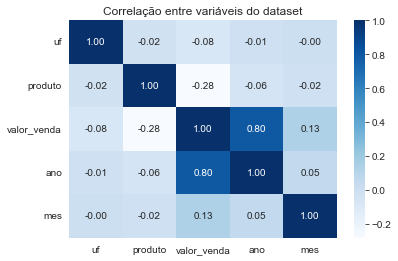

In [23]:
# Analisando a correlação entre as variáveis é possível identificar que
# as variáveis "ano" e "valor_venda" possuem a maior correlação entre si
# diferente das demais variáveis

sns.heatmap(df.corr()
           ,annot = True
           ,fmt   = '.2f'
           ,cmap  = 'Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

### Comportamento variável dependente (y)

In [24]:
# Agrupando dados por ano e mês, obtendo a média do valor de venda
df_agg = df.groupby(['ano', 'mes']).agg({'valor_venda' : 'mean'}).reset_index()

<AxesSubplot:title={'center':'Preço de venda'}, xlabel='Reais'>

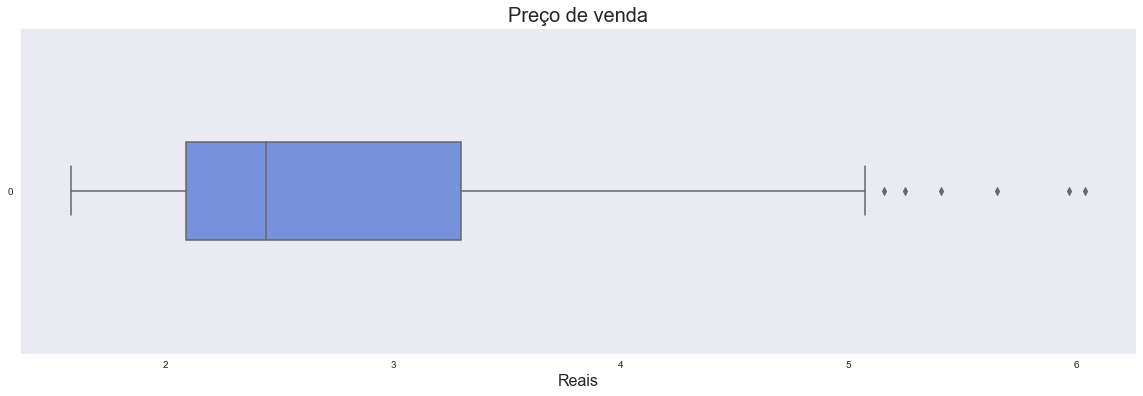

In [25]:
# Boxplot utilizando valores agrupados
ax = sns.boxplot(data = df_agg['valor_venda'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço de venda', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

In [26]:
# Resumo das estatísticas descritivas para colunas numéricas do dataframe
df['valor_venda'].describe().round(2)

count    18814056.00
mean            2.71
std             1.07
min             0.66
25%             1.99
50%             2.50
75%             3.12
max             8.99
Name: valor_venda, dtype: float64

Text(0.5, 0, 'Preço dos combusitveis')

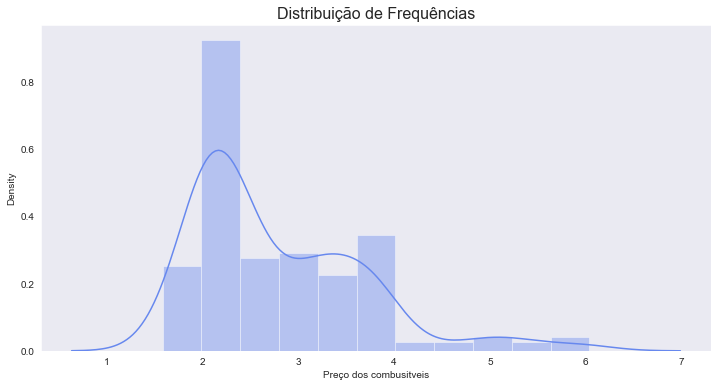

In [27]:
ax = sns.distplot(df_agg['valor_venda'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 16)
ax.set_xlabel('Preço dos combusitveis')

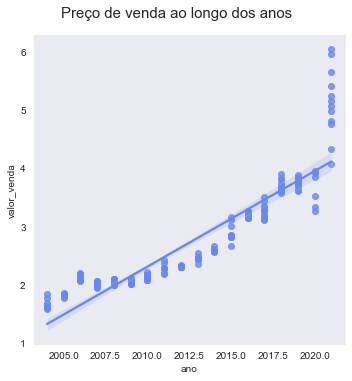

In [28]:
# Valores agrupados
ax = sns.lmplot(x = 'ano', y = 'valor_venda', data = df_agg, height = 5)
ax.fig.suptitle('Preço de venda ao longo dos anos', fontsize = 15, y = 1.05)
ax

## Análise dos Dados por Tipo de Combustível

### Gasolina Aditivada

In [23]:
# Filtrando apenas dados referentes à Gasolina Aditivada do dataframe inicial
df_gasolina_aditivada = df[df['produto'].eq(1)]

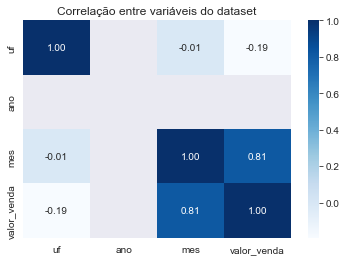

In [30]:
#-------------------------------#
# CORRELAÇÃO ENTRE AS VARIÁVEIS #
#-------------------------------#

df_gasolina_aditivada_corr = df_gasolina_aditivada[['uf', 'ano', 'mes', 'valor_venda']]

sns.heatmap(df_gasolina_aditivada_corr.corr()
           ,annot = True
           ,fmt   = '.2f'
           ,cmap  = 'Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [31]:
# Agrupando dados da Gasolina Aditivada por ano e mês, obtendo a média do valor de venda
df_gasolina_aditivada_agg = df_gasolina_aditivada.groupby(['ano', 'mes']).agg({'valor_venda' : 'mean'}).reset_index()

<AxesSubplot:title={'center':'Preço de venda'}, xlabel='Reais'>

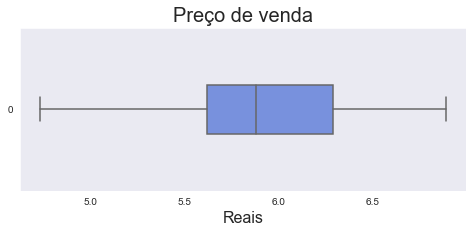

In [32]:
# Boxplot utilizando valores agrupados
ax = sns.boxplot(data = df_gasolina_aditivada_agg['valor_venda'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(8, 3)
ax.set_title('Preço de venda', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

Text(0.5, 0, 'Valor de venda dos combusitveis')

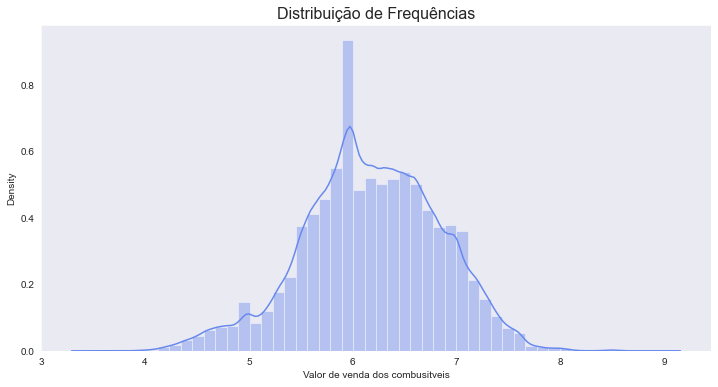

In [33]:
ax = sns.distplot(df_gasolina_aditivada['valor_venda'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 16)
ax.set_xlabel('Valor de venda dos combusitveis')

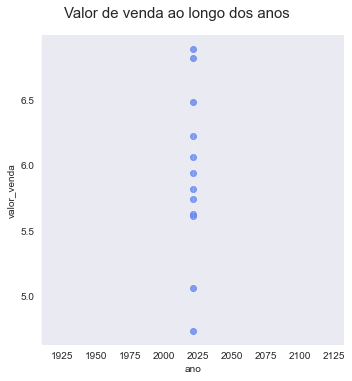

In [34]:
# Valores agrupados para Gasolina Aditivada
ax = sns.lmplot(x = 'ano', y = 'valor_venda', data = df_gasolina_aditivada_agg, height = 5)
ax.fig.suptitle('Valor de venda ao longo dos anos', fontsize = 15, y = 1.05)
ax

In [35]:
# Agrupando os valores do dataframe individual de Gasolina Aditivada,
# podemos ver que todos os registros são do ano de 2021
df_gasolina_aditivada.groupby(['ano']).agg({'valor_venda' : 'count'}).reset_index()

,ano,valor_venda
0,2021,240912


In [36]:
# O dataframe individual com registros de Gasolina Aditivada possui 240.912 registros
df_gasolina_aditivada.count()

uf             240912
produto        240912
valor_venda    240912
ano            240912
mes            240912
dtype: int64

In [37]:
# Conferindo o dataframe inicial, filtrando apenas os registros que se referem à Gasolina Aditivada temos a mesma quantidade
df.loc[(df['produto'] == 1)].count()

uf             240912
produto        240912
valor_venda    240912
ano            240912
mes            240912
dtype: int64

In [24]:
#-----------------------------------------------------------------#
# ELIMINANDO REGISTROS DE GASOLINA ADITIVADA DO DATAFRAME INICIAL #
#-----------------------------------------------------------------#

df = df.drop(df_gasolina_aditivada.index)

# 18.814.056 total de registros
# 240.912 registros de Gasolina Aditivada
# Ao dropar registros de Gasolina Aditivada o total deve ser de 18.573.144

In [39]:
df.count()

uf             18573144
produto        18573144
valor_venda    18573144
ano            18573144
mes            18573144
dtype: int64

### Gasolina

In [25]:
# Filtrando apenas dados referentes à Gasolina do dataframe inicial
df_gasolina = df[df['produto'].eq(2)]

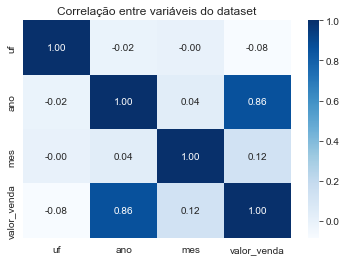

In [41]:
#-------------------------------#
# CORRELAÇÃO ENTRE AS VARIÁVEIS #
#-------------------------------#

df_gasolina_corr = df_gasolina[['uf', 'ano', 'mes', 'valor_venda']]

sns.heatmap(df_gasolina_corr.corr()
           ,annot = True
           ,fmt   = '.2f'
           ,cmap  = 'Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [42]:
# Agrupando dados da Gasolina por ano e mês, obtendo a média do valor de venda
df_gasolina_agg = df_gasolina.groupby(['ano', 'mes']).agg({'valor_venda' : 'mean'}).reset_index()

<AxesSubplot:title={'center':'Preço de venda'}>

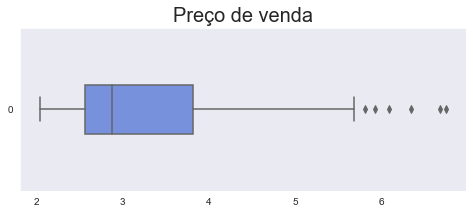

In [43]:
# Boxplot utilizando valores agrupados
ax = sns.boxplot(data = df_gasolina_agg['valor_venda'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(8, 3)
ax.set_title('Preço de venda', fontsize=20)
ax

Text(0.5, 0, 'Preço dos combusitveis')

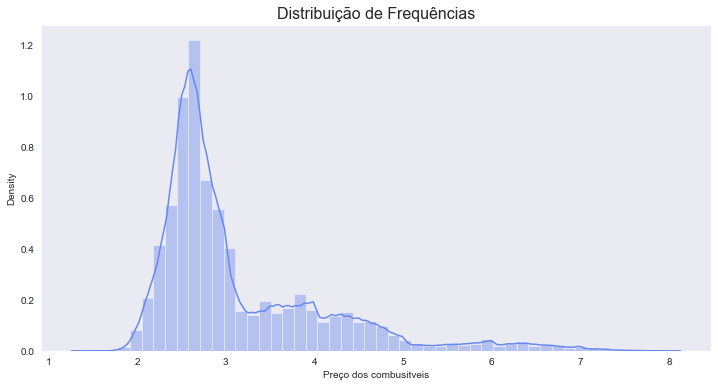

In [44]:
ax = sns.distplot(df_gasolina['valor_venda'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 16)
ax.set_xlabel('Preço dos combusitveis')

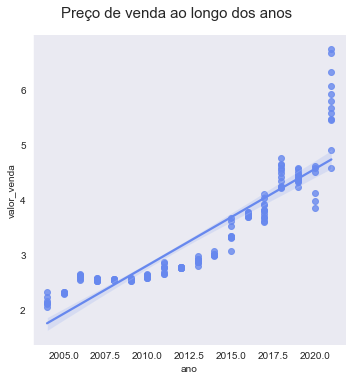

In [45]:
# Valores agrupados para Gasolina
ax = sns.lmplot(x = 'ano', y = 'valor_venda', data = df_gasolina_agg, height = 5)
ax.fig.suptitle('Preço de venda ao longo dos anos', fontsize = 15, y = 1.05)
ax

### Etanol

In [26]:
# Filtrando apenas dados referentes a Etanol do dataframe inicial
df_etanol = df[df['produto'].eq(3)]

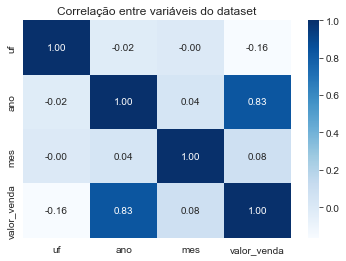

In [47]:
#-------------------------------#
# CORRELAÇÃO ENTRE AS VARIÁVEIS #
#-------------------------------#

df_etanol_corr = df_etanol[['uf', 'ano', 'mes', 'valor_venda']]

sns.heatmap(df_etanol_corr.corr()
           ,annot = True
           ,fmt   = '.2f'
           ,cmap  = 'Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [48]:
# Agrupando dados do Etanol por ano e mês, obtendo a média do valor de venda
df_etanol_agg = df_etanol.groupby(['ano', 'mes']).agg({'valor_venda' : 'mean'}).reset_index()

<AxesSubplot:title={'center':'Preço de venda'}, xlabel='Reais'>

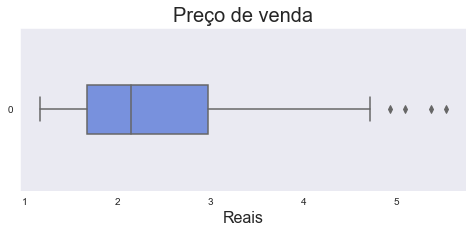

In [49]:
# Boxplot utilizando valores agrupados
ax = sns.boxplot(data = df_etanol_agg['valor_venda'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(8, 3)
ax.set_title('Preço de venda', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

Text(0.5, 0, 'Preço dos combusitveis')

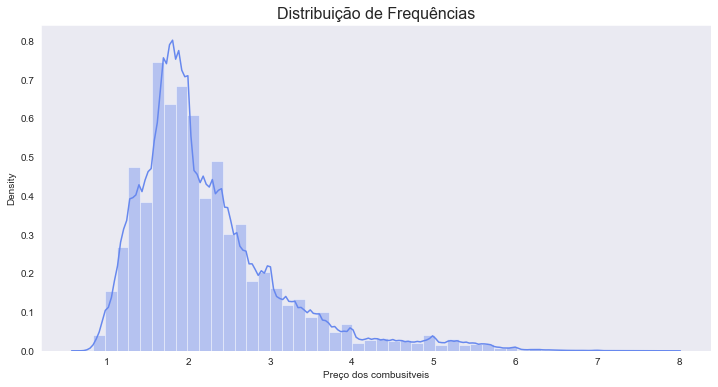

In [50]:
ax = sns.distplot(df_etanol['valor_venda'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 16)
ax.set_xlabel('Preço dos combusitveis')

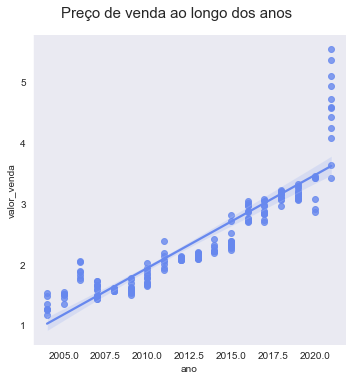

In [51]:
# Valores agrupados para Etanol
ax = sns.lmplot(x = 'ano', y = 'valor_venda', data = df_etanol_agg, height = 5)
ax.fig.suptitle('Preço de venda ao longo dos anos', fontsize = 15, y = 1.05)
ax

### Diesel S10

In [27]:
# Filtrando apenas dados referentes a diesel S10 do dataframe inicial
df_diesel_s10 = df[df['produto'].eq(4)]

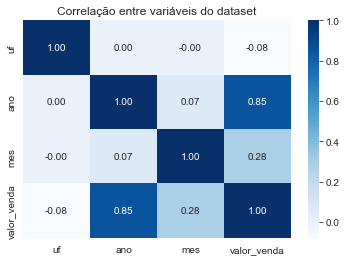

In [53]:
#-------------------------------#
# CORRELAÇÃO ENTRE AS VARIÁVEIS #
#-------------------------------#

df_diesel_s10_corr = df_diesel_s10[['uf', 'ano', 'mes', 'valor_venda']]

sns.heatmap(df_diesel_s10_corr.corr()
           ,annot = True
           ,fmt   = '.2f'
           ,cmap  = 'Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [54]:
# Agrupando dados do Diesel S10 por ano e mês, obtendo a média do valor de venda
df_diesel_s10_agg = df_diesel_s10.groupby(['ano', 'mes']).agg({'valor_venda' : 'mean'}).reset_index()

<AxesSubplot:title={'center':'Preço de venda'}, xlabel='Reais'>

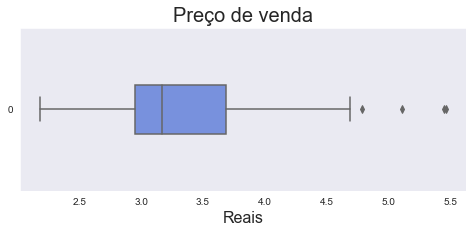

In [55]:
# Boxplot utilizando valores agrupados
ax = sns.boxplot(data = df_diesel_s10_agg['valor_venda'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(8, 3)
ax.set_title('Preço de venda', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

Text(0.5, 0, 'Preço dos combusitveis')

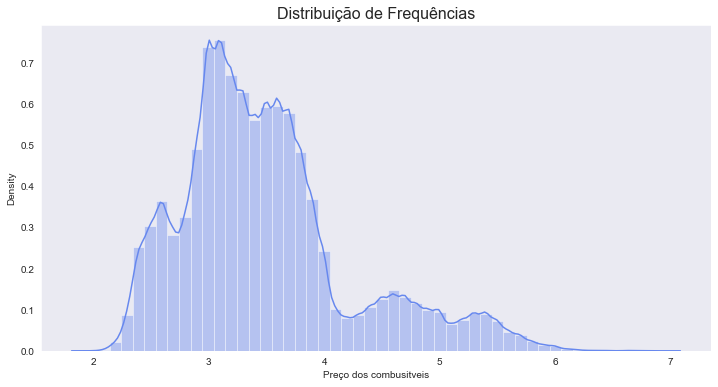

In [56]:
ax = sns.distplot(df_diesel_s10['valor_venda'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 16)
ax.set_xlabel('Preço dos combusitveis')

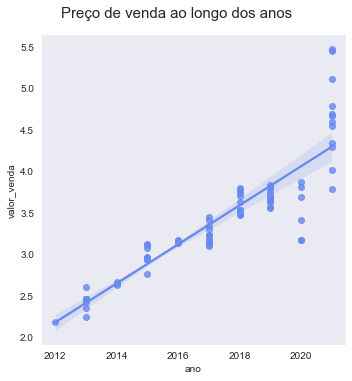

In [57]:
# Valores agrupados para Diesel S10
ax = sns.lmplot(x = 'ano', y = 'valor_venda', data = df_diesel_s10_agg, height = 5)
ax.fig.suptitle('Preço de venda ao longo dos anos', fontsize = 15, y = 1.05)
ax

### Diesel S50

In [28]:
# Filtrando apenas dados referentes a Diesel S50 do dataframe inicial
df_diesel_s50 = df[df['produto'].eq(5)]

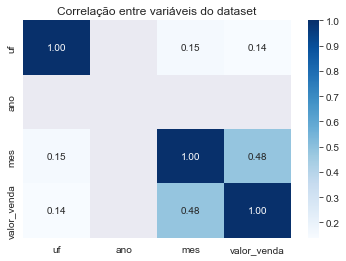

In [59]:
#-------------------------------#
# CORRELAÇÃO ENTRE AS VARIÁVEIS #
#-------------------------------#

df_diesel_s50_corr = df_diesel_s50[['uf', 'ano', 'mes', 'valor_venda']]

sns.heatmap(df_diesel_s50_corr.corr()
           ,annot = True
           ,fmt   = '.2f'
           ,cmap  = 'Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [60]:
# Agrupando dados do Diesel S50 por ano e mês, obtendo a média do valor de venda
df_diesel_s50_agg = df_diesel_s50.groupby(['ano', 'mes']).agg({'valor_venda' : 'mean'}).reset_index()

<AxesSubplot:title={'center':'Preço de venda'}, xlabel='Reais'>

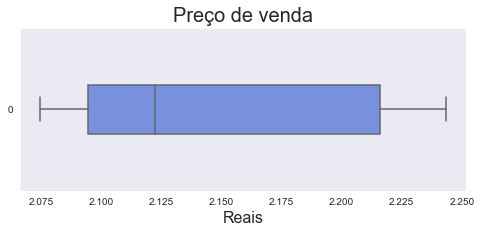

In [61]:
# Boxplot utilizando valores agrupados
ax = sns.boxplot(data = df_diesel_s50_agg['valor_venda'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(8, 3)
ax.set_title('Preço de venda', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

Text(0.5, 0, 'Preço dos combusitveis')

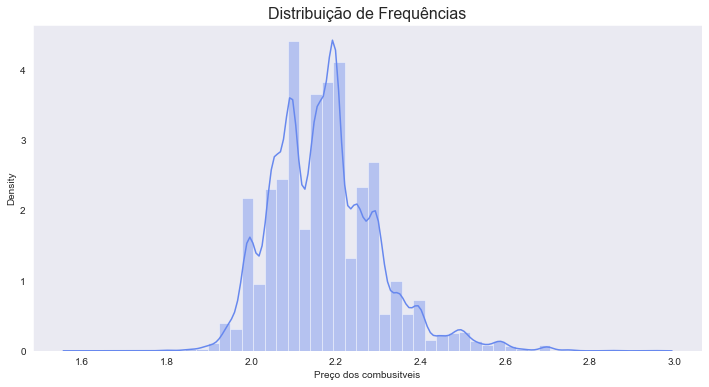

In [62]:
ax = sns.distplot(df_diesel_s50['valor_venda'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 16)
ax.set_xlabel('Preço dos combusitveis')

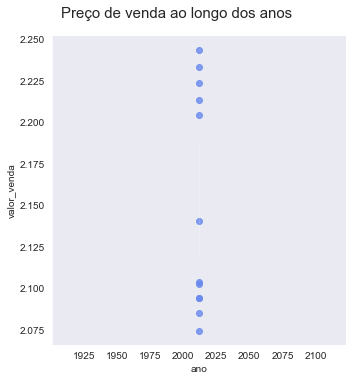

In [63]:
# Valores agrupados para Diesel S50
ax = sns.lmplot(x = 'ano', y = 'valor_venda', data = df_diesel_s50_agg, height = 5)
ax.fig.suptitle('Preço de venda ao longo dos anos', fontsize = 15, y = 1.05)
ax

In [64]:
# Agrupando os valores do dataframe individual de Diesel S50,
# podemos ver que todos os registros são do ano de 2012
df_diesel_s50.groupby(['ano']).agg({'valor_venda' : 'count'}).reset_index()

,ano,valor_venda
0,2012,44495


In [65]:
# O dataframe individual com registros de Diesel S50 possui 44.495 registros
df_diesel_s50.count()

uf             44495
produto        44495
valor_venda    44495
ano            44495
mes            44495
dtype: int64

In [66]:
# Conferindo o dataframe inicial, filtrando apenas os registros que se referem à Diesel S50 temos a mesma quantidade
df.loc[(df['produto'] == 5)].count()

uf             44495
produto        44495
valor_venda    44495
ano            44495
mes            44495
dtype: int64

In [29]:
#---------------------------------------------------------#
# ELIMINANDO REGISTROS DE DIESEL S50 DO DATAFRAME INICIAL #
#---------------------------------------------------------#

df = df.drop(df_diesel_s50.index)

# 18.573.144 total de registros
# 44.495 registros de Diesel S50
# Ao dropar registros de Diesel S50 o total deve ser de 18.528.649

In [68]:
df.count()

uf             18528649
produto        18528649
valor_venda    18528649
ano            18528649
mes            18528649
dtype: int64

### Diesel

In [30]:
# Filtrando apenas dados referentes a Diesel do dataframe inicial
df_diesel = df[df['produto'].eq(6)]

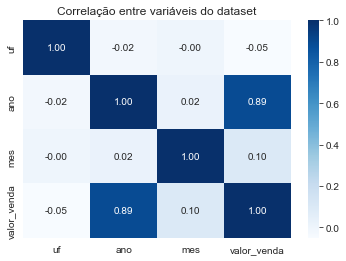

In [70]:
#-------------------------------#
# CORRELAÇÃO ENTRE AS VARIÁVEIS #
#-------------------------------#

df_diesel_corr = df_diesel[['uf', 'ano', 'mes', 'valor_venda']]

sns.heatmap(df_diesel_corr.corr()
           ,annot = True
           ,fmt   = '.2f'
           ,cmap  = 'Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [71]:
# Agrupando dados do Diesel por ano e mês, obtendo a média do valor de venda
df_diesel_agg = df_diesel.groupby(['ano', 'mes']).agg({'valor_venda' : 'mean'}).reset_index()

<AxesSubplot:title={'center':'Preço de venda'}, xlabel='Reais'>

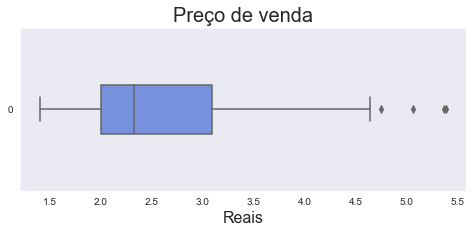

In [72]:
# Boxplot utilizando valores agrupados
ax = sns.boxplot(data = df_diesel_agg['valor_venda'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(8, 3)
ax.set_title('Preço de venda', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

Text(0.5, 0, 'Preço dos combusitveis')

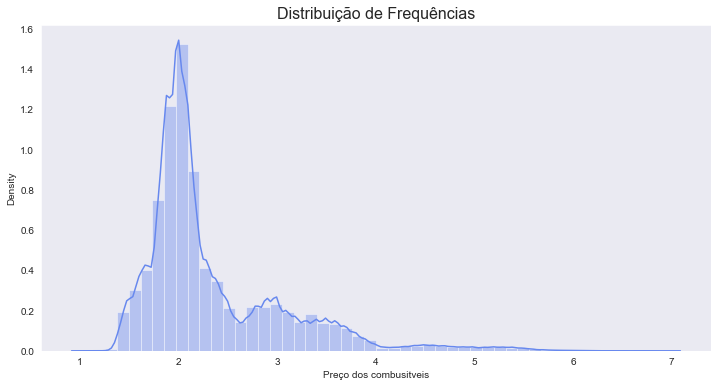

In [73]:
ax = sns.distplot(df_diesel['valor_venda'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 16)
ax.set_xlabel('Preço dos combusitveis')

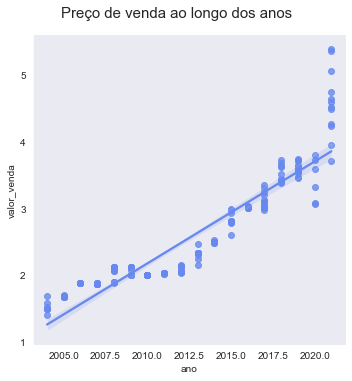

In [74]:
# Valores agrupados para Diesel
ax = sns.lmplot(x = 'ano', y = 'valor_venda', data = df_diesel_agg, height = 5)
ax.fig.suptitle('Preço de venda ao longo dos anos', fontsize = 15, y = 1.05)
ax

### GNV

In [31]:
# Filtrando apenas dados referentes a GNV do dataframe inicial
df_gnv = df[df['produto'].eq(7)]

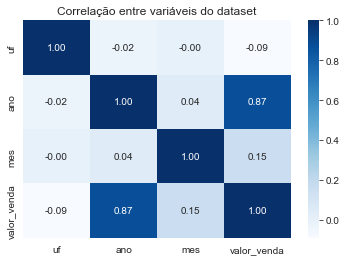

In [76]:
#-------------------------------#
# CORRELAÇÃO ENTRE AS VARIÁVEIS #
#-------------------------------#

df_gnv_corr = df_gnv[['uf', 'ano', 'mes', 'valor_venda']]

sns.heatmap(df_gnv_corr.corr()
           ,annot = True
           ,fmt   = '.2f'
           ,cmap  = 'Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [77]:
# Agrupando dados do GNV por ano e mês, obtendo a média do valor de venda
df_gnv_agg = df_gnv.groupby(['ano', 'mes']).agg({'valor_venda' : 'mean'}).reset_index()

<AxesSubplot:title={'center':'Preço de venda'}, xlabel='Reais'>

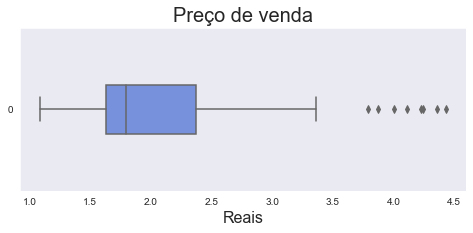

In [78]:
# Boxplot utilizando valores agrupados
ax = sns.boxplot(data = df_gnv_agg['valor_venda'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(8, 3)
ax.set_title('Preço de venda', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

Text(0.5, 0, 'Preço dos combusitveis')

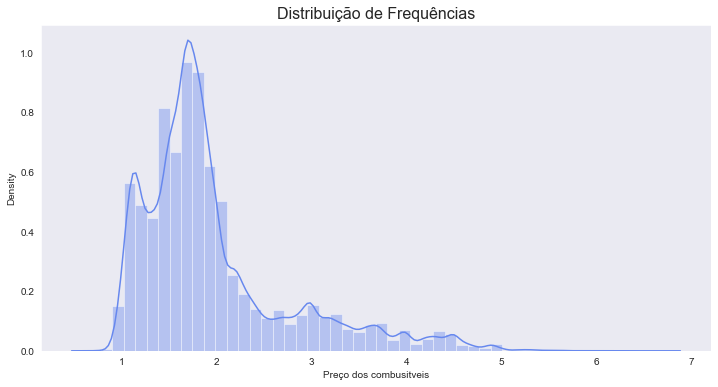

In [79]:
ax = sns.distplot(df_gnv['valor_venda'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 16)
ax.set_xlabel('Preço dos combusitveis')

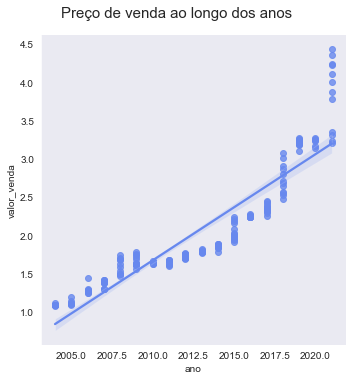

In [80]:
# Valores agrupados para GNV
ax = sns.lmplot(x = 'ano', y = 'valor_venda', data = df_gnv_agg, height = 5)
ax.fig.suptitle('Preço de venda ao longo dos anos', fontsize = 15, y = 1.05)
ax

# Modelos de Machine Learning

## Estimando o modelo

In [32]:
#---------------------#
# Variável dependente #
#---------------------#
y = df['valor_venda']

In [33]:
#-------------------------#
# Variáveis independentes #
#-------------------------#
x = df[['uf', 'produto', 'ano', 'mes']]

In [34]:
#--------------------#
# ESTIMANDO O MODELO #
#--------------------#

# statsmodels precisa que os modelos sejam estimados com constantes
# nesta lib é necessário informar esta constante
x_constant = sm.add_constant(x)

In [84]:
# OLS é o método dos mínimos quadrados ordinários
# hasconst = parâmetro que indica se queremos que tenha constante ou não (True significa que sim)
# O "fit()" no final significa que já queremos que o modelo seja ajustado
modelo_statsmodels = sm.OLS(y, x_constant, hasconst = True).fit()

In [85]:
# Teste F avalia o conjunto de parâmetros
# Teste t avalia os parâmetros individualmente

# Teste F-statistic --> teste de significância dos parâmetros do modelo, conjuntamente
# Testa se vc aceita a hipótese ou não de todos os parâmetros serem iguais a zero
# Prob F-statistic com valores de 0.05 pra cima --> devemos rejeitar o modelo
# Prob F-statistic com valores de 0.05 pra baixo --> tudo ok

# Teste t --> funciona do mesmo jeito que o F-statistic (considerando o resultado de 0.05 para baixo ou para cima)
# P>|t| é a mesma coisa que Prob F-statistic

modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            valor_venda   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                 1.046e+07
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:38:06   Log-Likelihood:            -1.5235e+07
No. Observations:            18528649   AIC:                         3.047e+07
Df Residuals:                18528644   BIC:                         3.047e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -312.1621      0.052  -6033.623      0.000    -312.264    -312.061
uf            -0.0109   1.69e-05   -643.189      0.000      -0.011      -0.011
produto       -0.1360   7.92e-05  -1718.166      0.000      -0.136      -0.136
ano            0.1567   2.57e-05   6096.234      0.000       0.157       0.157
mes            0.0223   3.77e-05    590.484      0.000       0.022       0.022
==============================================================================
Omnibus:                  1816208.870   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4456694.008
Skew:                           0.585   Prob(JB):                         0.00
Kurtosis:                       5.098   Cond. No.                     8.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dividindo Dados para Treino e Teste

In [35]:
#------------------------------------------------#
# DIVIDINDO DADOS EM CONJUNTOS DE TREINO E TESTE #
#------------------------------------------------#

# 70% PARA TREINO
# 30% PARA TESTE

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Linear Regression

In [36]:
#----------------------#
# INSTANCIANDO MODELOS #
#----------------------#

# Linear Regression
modelo_lr = LinearRegression()

# Ajuste Lasso (L1)
modelo_lasso = Lasso()

# Ajuste Ridge (L2)
modelo_ridge = Ridge()

# Ajuste ElasticNet (L1 + L2)
modelo_elasticnet = ElasticNet()

In [37]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Linear Regression
modelo_lr.fit(x_train, y_train)

# Ajuste Lasso (L1)
modelo_lasso.fit(x_train, y_train)

# Ajuste Ridge (L2)
modelo_ridge.fit(x_train, y_train)

# Ajuste ElasticNet (L1 + L2)
modelo_elasticnet.fit(x_train, y_train)

ElasticNet()

## Decision Tree Regressor

In [38]:
#---------------------#
# INSTANCIANDO MODELO #
#---------------------#
modelo_dt = DecisionTreeRegressor()

In [39]:
#------------------#
# AJUSTANDO MODELO #
#------------------#
modelo_dt.fit(x_train, y_train)

DecisionTreeRegressor()

## Random Forest Regressor

In [40]:
#---------------------#
# INSTANCIANDO MODELO #
#---------------------#
modelo_rf = RandomForestRegressor()

In [41]:
#------------------#
# AJUSTANDO MODELO #
#------------------#
modelo_rf.fit(x_train, y_train)

RandomForestRegressor()

## Métricas para Avaliações dos Modelos

<b>MAE (Mean Absolute Error)</b>
</br>
Mede a qualidade do modelo, calculando o erro absoluto médio entre os valores observados.
</br>
Quanto menor o valor obtido, melhor.
</br>
</br>
<b>RMSE (Root Mean Square Error)</b>
</br>
Calcula a raiz quadrática média de erros entre os valores observados.
</br>
É a raiz quadrada do erro médio quadrado (Mean Squared Error).
</br>
Quanto menor o valor obtido, melhor.
</br>
</br>
<b>R² | Coeficiente de Determinação</b>
</br>
Mede a quantidade de variância dos dados que é explicada pelo modelo.
</br>
Calcula qual porcentagem da variância pode ser explicada pelo modelo de regressão.
</br>
Quanto maior o valor obtido, maior o grau de explicação para a variância obtido.
</br>
(Gera valores entre 0 e 1)
</br>

In [93]:
#-------------------------------#
# MÉTRICAS PARA DADOS DE TREINO #
#-------------------------------#

#--------------------------#
# DEFININDO VALOR PREVISTO #
#--------------------------#

# Linear Regression
y_previsto_train_lr = modelo_lr.predict(x_train)

# Lasso (l1)
y_previsto_train_lasso = modelo_lasso.predict(x_train)

# Ridge (L2)
y_previsto_train_ridge = modelo_ridge.predict(x_train)

# ElasticNet (L1 + L2)
y_previsto_train_elasticnet = modelo_elasticnet.predict(x_train)

# Decision Tree Regressor
y_previsto_train_dt = modelo_dt.predict(x_train)

# Random Forest Regressor
y_previsto_train_rf = modelo_rf.predict(x_train)

#---------------------#
# CALCULANDO MÉTRICAS #
#---------------------#

#-------------------#
# LINEAR REGRESSION #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_train_lr = mean_absolute_error(y_train, y_previsto_train_lr)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lr))

modelo_mse_train_lr = mean_squared_error(y_train, y_previsto_train_lr)
modelo_rmse_train_lr = math.sqrt(modelo_mse_train_lr)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lr))

modelo_r2_train_lr = modelo_lr.score(x_train, y_train)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lr))

#-------------------#
# AJUSTE LASSO (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_train_lasso = mean_absolute_error(y_train, y_previsto_train_lasso)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lasso))

modelo_mse_train_lasso = mean_squared_error(y_train, y_previsto_train_lasso)
modelo_rmse_train_lasso = math.sqrt(modelo_mse_train_lasso)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lasso))

modelo_r2_train_lasso = modelo_lasso.score(x_train, y_train)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lasso))

#-------------------#
# AJUSTE RIDGE (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_train_ridge = mean_absolute_error(y_train, y_previsto_train_ridge)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_ridge))

modelo_mse_train_ridge = mean_squared_error(y_train, y_previsto_train_ridge)
modelo_rmse_train_ridge = math.sqrt(modelo_mse_train_ridge)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_ridge))

modelo_r2_train_ridge = modelo_ridge.score(x_train, y_train)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_ridge))

#-----------------------------#
# AJUSTE ELASTICNET (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_train_elasticnet = mean_absolute_error(y_train, y_previsto_train_elasticnet)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_elasticnet))

modelo_mse_train_elasticnet = mean_squared_error(y_train, y_previsto_train_elasticnet)
modelo_rmse_train_elasticnet = math.sqrt(modelo_mse_train_elasticnet)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_elasticnet))

modelo_r2_train_elasticnet = modelo_elasticnet.score(x_train, y_train)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_elasticnet))

#-----------------------------#
#   DECISION TREE REGRESSOR   #
#-----------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_dt = mean_absolute_error(y_train, y_previsto_train_dt)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_dt))

modelo_mse_train_dt = mean_squared_error(y_train, y_previsto_train_dt)
modelo_rmse_train_dt = math.sqrt(modelo_mse_train_dt)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_dt))

modelo_r2_train_dt = modelo_dt.score(x_train, y_train)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_dt))

#-----------------------------#
#   RANDOM FOREST REGRESSOR   #
#-----------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_rf = mean_absolute_error(y_train, y_previsto_train_rf)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_rf))

modelo_mse_train_rf = mean_squared_error(y_train, y_previsto_train_rf)
modelo_rmse_train_rf = math.sqrt(modelo_mse_train_rf)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_rf))

modelo_r2_train_rf = modelo_rf.score(x_train, y_train)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_rf))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Treino = 0.42
RMSE Treino = 0.55
R²   Treino = 0.69
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Treino = 0.47
RMSE Treino = 0.64
R²   Treino = 0.59
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Treino = 0.42
RMSE Treino = 0.55
R²   Treino = 0.69
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Treino = 0.46
RMSE Treino = 0.61
R²   Treino = 0.62
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Treino = 0.10
RMSE Treino = 0.13
R²   Treino = 0.98
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Treino = 0.10
RMSE Treino = 0.13
R²   Treino = 0.98


In [94]:
#------------------------------#
# MÉTRICAS PARA DADOS DE TESTE #
#------------------------------#

#--------------------------#
# DEFININDO VALOR PREVISTO #
#--------------------------#

# Linear Regression
y_previsto_test_lr = modelo_lr.predict(x_test)

# Lasso (L1)
y_previsto_test_lasso = modelo_lasso.predict(x_test)

# Ridge (L2)
y_previsto_test_ridge = modelo_ridge.predict(x_test)

# ElasticNet (L1 + L2)
y_previsto_test_elasticnet = modelo_elasticnet.predict(x_test)

# Decision Tree Regressor
y_previsto_test_dt = modelo_dt.predict(x_test)

# Random Forest Regressor
y_previsto_test_rf = modelo_rf.predict(x_test)

#---------------------#
# CALCULANDO MÉTRICAS #
#---------------------#

#-------------------#
# LINEAR REGRESSION #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_test_lr = mean_absolute_error(y_test, y_previsto_test_lr)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lr))

modelo_mse_test_lr = mean_squared_error(y_test, y_previsto_test_lr)
modelo_rmse_test_lr = math.sqrt(modelo_mse_test_lr)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lr))

modelo_r2_test_lr = modelo_lr.score(x_test, y_test)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lr))

#-------------------#
# AJUSTE LASSO (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_test_lasso = mean_absolute_error(y_test, y_previsto_test_lasso)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lasso))

modelo_mse_test_lasso = mean_squared_error(y_test, y_previsto_test_lasso)
modelo_rmse_test_lasso = math.sqrt(modelo_mse_test_lasso)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lasso))

modelo_r2_test_lasso = modelo_lasso.score(x_test, y_test)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lasso))

#-------------------#
# AJUSTE RIDGE (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_test_ridge = mean_absolute_error(y_test, y_previsto_test_ridge)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_ridge))

modelo_mse_test_ridge = mean_squared_error(y_test, y_previsto_test_ridge)
modelo_rmse_test_ridge = math.sqrt(modelo_mse_test_ridge)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_ridge))

modelo_r2_test_ridge = modelo_ridge.score(x_test, y_test)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_ridge))

#-----------------------------#
# AJUSTE ELASTICNET (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_test_elasticnet = mean_absolute_error(y_test, y_previsto_test_elasticnet)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_elasticnet))

modelo_mse_test_elasticnet = mean_squared_error(y_test, y_previsto_test_elasticnet)
modelo_rmse_test_elasticnet = math.sqrt(modelo_mse_test_elasticnet)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_elasticnet))

modelo_r2_test_elasticnet = modelo_elasticnet.score(x_test, y_test)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_elasticnet))

#-----------------------------#
#   DECISION TREE REGRESSOR   #
#-----------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_dt = mean_absolute_error(y_test, y_previsto_test_dt)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_dt))

modelo_mse_test_dt = mean_squared_error(y_test, y_previsto_test_dt)
modelo_rmse_test_dt = math.sqrt(modelo_mse_test_dt)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_dt))

modelo_r2_test_dt = modelo_dt.score(x_test, y_test)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_dt))

#-----------------------------#
#   RANDOM FOREST REGRESSOR   #
#-----------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_rf = mean_absolute_error(y_test, y_previsto_test_rf)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_rf))

modelo_mse_test_rf = mean_squared_error(y_test, y_previsto_test_rf)
modelo_rmse_test_rf = math.sqrt(modelo_mse_test_rf)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_rf))

modelo_r2_test_rf = modelo_rf.score(x_test, y_test)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_rf))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Teste = 0.42
RMSE Teste = 0.55
R²   Teste = 0.69
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Teste = 0.47
RMSE Teste = 0.64
R²   Teste = 0.59
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Teste = 0.42
RMSE Teste = 0.55
R²   Teste = 0.69
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Teste = 0.46
RMSE Teste = 0.61
R²   Teste = 0.62
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Teste = 0.10
RMSE Teste = 0.13
R²   Teste = 0.98
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Teste = 0.10
RMSE Teste = 0.13
R²   Teste = 0.98


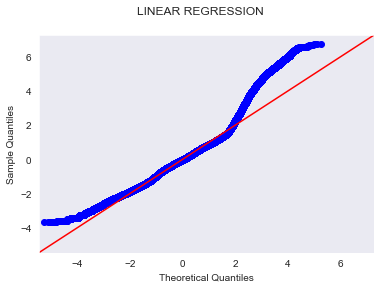

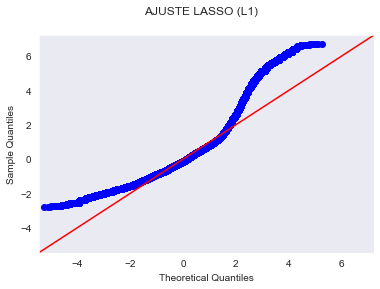

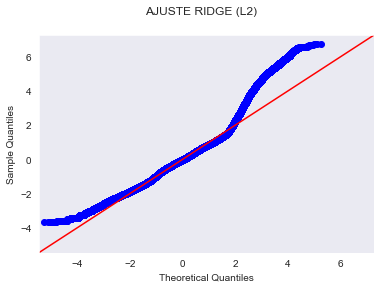

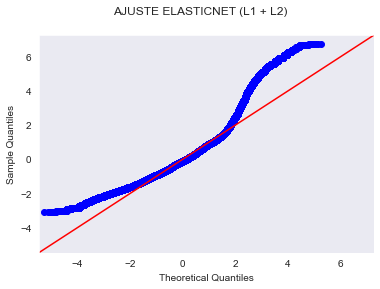

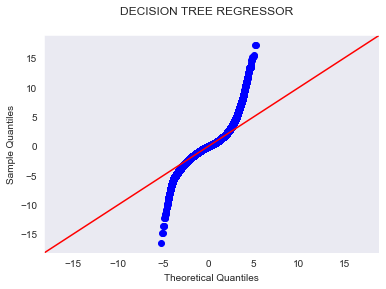

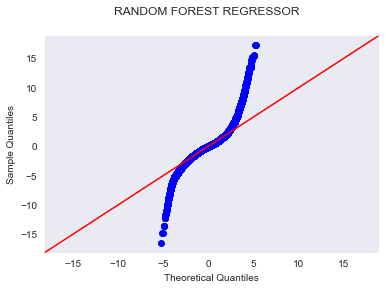

In [95]:
#-------------------------------------------------------------------------#
# DISTRIBUIÇÃO DE PROBABILIDADE DOS TERMOS DE ERRO (RESÍDUOS) DOS MODELOS #
#-------------------------------------------------------------------------#

#--------------------#
# Calculando resíduo #
#--------------------#

# Linear Regression
residuo_lr = y_train - y_previsto_train_lr

# Lasso (L1)
residuo_lasso = y_train - y_previsto_train_lasso

# Ridge (L2)
residuo_ridge = y_train - y_previsto_train_ridge

# ElasticNet (L1 + L2)
residuo_elasticnet = y_train - y_previsto_train_elasticnet

# Decision Tree Regressor
residuo_dt = y_train - y_previsto_train_dt

# Random Forest Regressor
residuo_rf = y_train - y_previsto_train_rf

#-------------------#
# Linear Regression #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_lr, dist = stats.norm, line = '45', fit = True)
figure.suptitle('LINEAR REGRESSION')
figure.show()

#------------#
# Lasso (L1) #
#------------#
figure = sm.graphics.qqplot(data = residuo_lasso, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE LASSO (L1)')
figure.show()

#------------#
# Ridge (L2) #
#------------#
figure = sm.graphics.qqplot(data = residuo_ridge, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE RIDGE (L2)')
figure.show()

#----------------------#
# ElasticNet (L1 + L2) #
#----------------------#
figure = sm.graphics.qqplot(data = residuo_elasticnet, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE ELASTICNET (L1 + L2)')
figure.show()

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
figure = sm.graphics.qqplot(data = residuo_dt, dist = stats.norm, line = '45', fit = True)
figure.suptitle('DECISION TREE REGRESSOR')
figure.show()

#-------------------------#
# Random Forest Regressor #
#-------------------------#
figure = sm.graphics.qqplot(data = residuo_rf, dist = stats.norm, line = '45', fit = True)
figure.suptitle('RANDOM FOREST REGRESSOR')
figure.show()

# Explorando Modelos de Machine Learning com os Tipos de Combustíveis

### Gasolina

In [42]:
#---------------------#
# VARIÁVEL DEPENDENTE #
#---------------------#
y_gasolina = df_gasolina['valor_venda']

In [43]:
#-------------------------#
# VARIÁVEIS INDEPENDENTES #
#-------------------------#
x_gasolina = df_gasolina[['uf', 'ano', 'mes']]

In [44]:
#------------------------------------------------#
# DIVIDINDO DADOS EM CONJUNTOS DE TREINO E TESTE #
#------------------------------------------------#

# 70% PARA TREINO
# 30% PARA TESTE

x_train_gasolina, x_test_gasolina, y_train_gasolina, y_test_gasolina = train_test_split(x_gasolina
                                                                                       ,y_gasolina
                                                                                       ,test_size = 0.3
                                                                                       ,random_state = 42)

In [45]:
#----------------------#
# INSTANCIANDO MODELOS #
#----------------------#

# Linear Regression
modelo_lr_gasolina = LinearRegression()

# Lasso (L1)
modelo_lasso_gasolina = Lasso()

# Ridge (L2)
modelo_ridge_gasolina = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_gasolina = ElasticNet()

# Decision Tree Regressor
modelo_dt_gasolina = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_gasolina = RandomForestRegressor()

In [46]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Linear Regression
modelo_lr_gasolina.fit(x_train_gasolina, y_train_gasolina)

# Lasso (L1)
modelo_lasso_gasolina.fit(x_train_gasolina, y_train_gasolina)

# Ridge (L2)
modelo_ridge_gasolina.fit(x_train_gasolina, y_train_gasolina)

# ElasticNet (L1 + L2)
modelo_elasticnet_gasolina.fit(x_train_gasolina, y_train_gasolina)

# Decision Tree Regressor
modelo_dt_gasolina.fit(x_train_gasolina, y_train_gasolina)

# Random Forest Regressor
modelo_rf_gasolina.fit(x_train_gasolina, y_train_gasolina)

RandomForestRegressor()

In [101]:
#-------------------------------#
# MÉTRICAS PARA DADOS DE TREINO #
#-------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_train_lr_gasolina = modelo_lr_gasolina.predict(x_train_gasolina)

# Lasso (L1)
y_previsto_train_lasso_gasolina = modelo_lasso_gasolina.predict(x_train_gasolina)

# Ridge (L2)
y_previsto_train_ridge_gasolina = modelo_ridge_gasolina.predict(x_train_gasolina)

# ElasticNet (L1 + L2)
y_previsto_train_elasticnet_gasolina = modelo_elasticnet_gasolina.predict(x_train_gasolina)

# Decision Tree Regressor
y_previsto_train_dt_gasolina = modelo_dt_gasolina.predict(x_train_gasolina)

# Random Forest Regressor
y_previsto_train_rf_gasolina = modelo_rf_gasolina.predict(x_train_gasolina)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_train_lr_gasolina = mean_absolute_error(y_train_gasolina, y_previsto_train_lr_gasolina)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lr_gasolina))

modelo_mse_train_lr_gasolina = mean_squared_error(y_train_gasolina, y_previsto_train_lr_gasolina)
modelo_rmse_train_lr_gasolina = math.sqrt(modelo_mse_train_lr_gasolina)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lr_gasolina))

modelo_r2_train_lr_gasolina = modelo_lr_gasolina.score(x_train_gasolina, y_train_gasolina)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lr_gasolina))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_train_lasso_gasolina = mean_absolute_error(y_train_gasolina, y_previsto_train_lasso_gasolina)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lasso_gasolina))

modelo_mse_train_lasso_gasolina = mean_squared_error(y_train_gasolina, y_previsto_train_lasso_gasolina)
modelo_rmse_train_lasso_gasolina = math.sqrt(modelo_mse_train_lasso_gasolina)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lasso_gasolina))

modelo_r2_train_lasso_gasolina = modelo_lasso_gasolina.score(x_train_gasolina, y_train_gasolina)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lasso_gasolina))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_train_ridge_gasolina = mean_absolute_error(y_train_gasolina, y_previsto_train_ridge_gasolina)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_ridge_gasolina))

modelo_mse_train_ridge_gasolina = mean_squared_error(y_train_gasolina, y_previsto_train_ridge_gasolina)
modelo_rmse_train_ridge_gasolina = math.sqrt(modelo_mse_train_ridge_gasolina)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_ridge_gasolina))

modelo_r2_train_ridge_gasolina = modelo_ridge_gasolina.score(x_train_gasolina, y_train_gasolina)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_ridge_gasolina))

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_train_elasticnet_gasolina = mean_absolute_error(y_train_gasolina, y_previsto_train_elasticnet_gasolina)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_elasticnet_gasolina))

modelo_mse_train_elasticnet_gasolina = mean_squared_error(y_train_gasolina, y_previsto_train_elasticnet_gasolina)
modelo_rmse_train_elasticnet_gasolina = math.sqrt(modelo_mse_train_elasticnet_gasolina)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_elasticnet_gasolina))

modelo_r2_train_elasticnet_gasolina = modelo_elasticnet_gasolina.score(x_train_gasolina, y_train_gasolina)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_elasticnet_gasolina))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_dt_gasolina = mean_absolute_error(y_train_gasolina, y_previsto_train_dt_gasolina)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_dt_gasolina))

modelo_mse_train_dt_gasolina = mean_squared_error(y_train_gasolina, y_previsto_train_dt_gasolina)
modelo_rmse_train_dt_gasolina = math.sqrt(modelo_mse_train_dt_gasolina)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_dt_gasolina))

modelo_r2_train_dt_gasolina = modelo_dt_gasolina.score(x_train_gasolina, y_train_gasolina)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_dt_gasolina))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_rf_gasolina = mean_absolute_error(y_train_gasolina, y_previsto_train_rf_gasolina)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_rf_gasolina))

modelo_mse_train_rf_gasolina = mean_squared_error(y_train_gasolina, y_previsto_train_rf_gasolina)
modelo_rmse_train_rf_gasolina = math.sqrt(modelo_mse_train_rf_gasolina)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_rf_gasolina))

modelo_r2_train_rf_gasolina = modelo_rf_gasolina.score(x_train_gasolina, y_train_gasolina)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_rf_gasolina))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Treino = 0.36
RMSE Treino = 0.48
R²   Treino = 0.76
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Treino = 0.35
RMSE Treino = 0.53
R²   Treino = 0.70
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Treino = 0.36
RMSE Treino = 0.48
R²   Treino = 0.76
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Treino = 0.34
RMSE Treino = 0.50
R²   Treino = 0.73
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Treino = 0.10
RMSE Treino = 0.14
R²   Treino = 0.98
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Treino = 0.10
RMSE Treino = 0.14
R²   Treino = 0.98


In [102]:
#------------------------------#
# MÉTRICAS PARA DADOS DE TESTE #
#------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_test_lr_gasolina = modelo_lr_gasolina.predict(x_test_gasolina)

# Lasso (L1)
y_previsto_test_lasso_gasolina = modelo_lasso_gasolina.predict(x_test_gasolina)

# Ridge (L2)
y_previsto_test_ridge_gasolina = modelo_ridge_gasolina.predict(x_test_gasolina)

# ElasticNet (L1 + L2)
y_previsto_test_elasticnet_gasolina = modelo_elasticnet_gasolina.predict(x_test_gasolina)

# Decision Tree Regressor
y_previsto_test_dt_gasolina = modelo_dt_gasolina.predict(x_test_gasolina)

# Random Forest Regressor
y_previsto_test_rf_gasolina = modelo_rf_gasolina.predict(x_test_gasolina)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_test_lr_gasolina = mean_absolute_error(y_test_gasolina, y_previsto_test_lr_gasolina)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lr_gasolina))

modelo_mse_test_lr_gasolina = mean_squared_error(y_test_gasolina, y_previsto_test_lr_gasolina)
modelo_rmse_test_lr_gasolina = math.sqrt(modelo_mse_test_lr_gasolina)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lr_gasolina))

modelo_r2_test_lr_gasolina = modelo_lr_gasolina.score(x_test_gasolina, y_test_gasolina)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lr_gasolina))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_test_lasso_gasolina = mean_absolute_error(y_test_gasolina, y_previsto_test_lasso_gasolina)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lasso_gasolina))

modelo_mse_test_lasso_gasolina = mean_squared_error(y_test_gasolina, y_previsto_test_lasso_gasolina)
modelo_rmse_test_lasso_gasolina = math.sqrt(modelo_mse_test_lasso_gasolina)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lasso_gasolina))

modelo_r2_test_lasso_gasolina = modelo_lasso_gasolina.score(x_test_gasolina, y_test_gasolina)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lasso_gasolina))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_test_ridge_gasolina = mean_absolute_error(y_test_gasolina, y_previsto_test_ridge_gasolina)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_ridge_gasolina))

modelo_mse_test_ridge_gasolina = mean_squared_error(y_test_gasolina, y_previsto_test_ridge_gasolina)
modelo_rmse_test_ridge_gasolina = math.sqrt(modelo_mse_test_ridge_gasolina)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_ridge_gasolina))

modelo_r2_test_ridge_gasolina = modelo_ridge_gasolina.score(x_test_gasolina, y_test_gasolina)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_ridge_gasolina))

#-----------------------------#
# Ajuste ElastciNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_test_elasticnet_gasolina = mean_absolute_error(y_test_gasolina, y_previsto_test_elasticnet_gasolina)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_elasticnet_gasolina))

modelo_mse_test_elasticnet_gasolina = mean_squared_error(y_test_gasolina, y_previsto_test_elasticnet_gasolina)
modelo_rmse_test_elasticnet_gasolina = math.sqrt(modelo_mse_test_elasticnet_gasolina)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_elasticnet_gasolina))

modelo_r2_test_elasticnet_gasolina = modelo_elasticnet_gasolina.score(x_test_gasolina, y_test_gasolina)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_elasticnet_gasolina))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_dt_gasolina = mean_absolute_error(y_test_gasolina, y_previsto_test_dt_gasolina)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_dt_gasolina))

modelo_mse_test_dt_gasolina = mean_squared_error(y_test_gasolina, y_previsto_test_dt_gasolina)
modelo_rmse_test_dt_gasolina = math.sqrt(modelo_mse_test_dt_gasolina)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_dt_gasolina))

modelo_r2_test_dt_gasolina = modelo_dt_gasolina.score(x_test_gasolina, y_test_gasolina)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_dt_gasolina))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_rf_gasolina = mean_absolute_error(y_test_gasolina, y_previsto_test_rf_gasolina)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_rf_gasolina))

modelo_mse_test_rf_gasolina = mean_squared_error(y_test_gasolina, y_previsto_test_rf_gasolina)
modelo_rmse_test_rf_gasolina = math.sqrt(modelo_mse_test_rf_gasolina)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_rf_gasolina))

modelo_r2_test_rf_gasolina = modelo_rf_gasolina.score(x_test_gasolina, y_test_gasolina)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_rf_gasolina))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Teste = 0.36
RMSE Teste = 0.48
R²   Teste = 0.76
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Teste = 0.35
RMSE Teste = 0.53
R²   Teste = 0.70
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Teste = 0.36
RMSE Teste = 0.48
R²   Teste = 0.76
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Teste = 0.34
RMSE Teste = 0.50
R²   Teste = 0.73
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Teste = 0.10
RMSE Teste = 0.14
R²   Teste = 0.98
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Teste = 0.10
RMSE Teste = 0.14
R²   Teste = 0.98


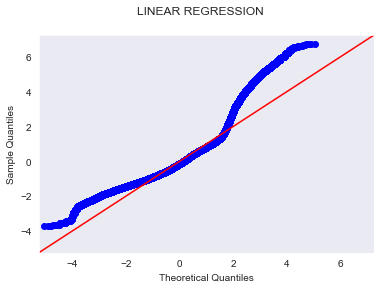

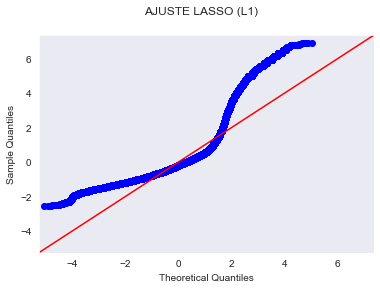

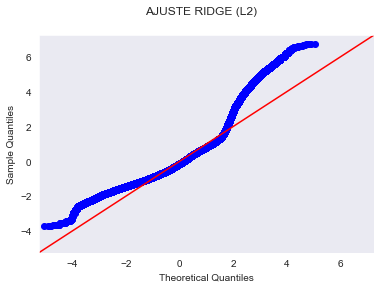

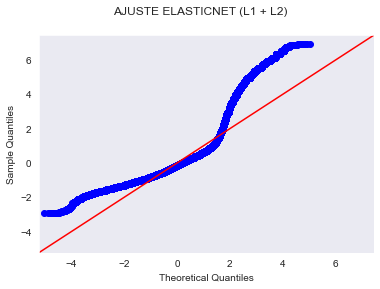

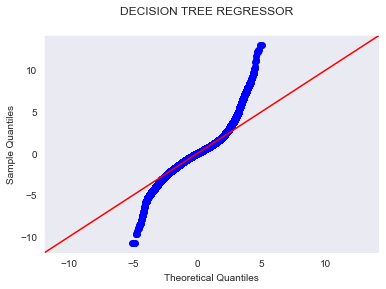

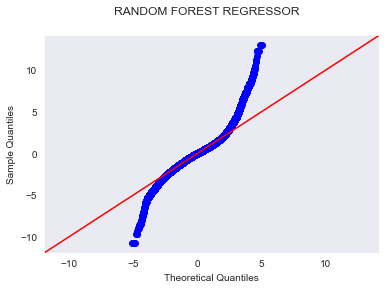

In [103]:
#-------------------------------------------------------------------------#
# DISTRIBUIÇÃO DE PROBABILIDADE DOS TERMOS DE ERRO (RESÍDUOS) DOS MODELOS #
#-------------------------------------------------------------------------#

#--------------------#
# Calculando resíduo #
#--------------------#

# Linear Regression
residuo_lr_gasolina  = y_train_gasolina - y_previsto_train_lr_gasolina

# Lasso (L1)
residuo_lasso_gasolina  = y_train_gasolina - y_previsto_train_lasso_gasolina

# Ridge (L2)
residuo_ridge_gasolina  = y_train_gasolina - y_previsto_train_ridge_gasolina

# ElasticNet
residuo_elasticnet_gasolina  = y_train_gasolina - y_previsto_train_elasticnet_gasolina

# Decision Tree Regressor
residuo_dt_gasolina  = y_train_gasolina - y_previsto_train_dt_gasolina

# Random Forest Regressor
residuo_rf_gasolina  = y_train_gasolina - y_previsto_train_rf_gasolina

#-------------------#
# Linear Regression #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_lr_gasolina, dist = stats.norm, line = '45', fit = True)
figure.suptitle('LINEAR REGRESSION')
figure.show()

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_lasso_gasolina, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE LASSO (L1)')
figure.show()

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_ridge_gasolina, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE RIDGE (L2)')
figure.show()

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
figure = sm.graphics.qqplot(data = residuo_elasticnet_gasolina, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE ELASTICNET (L1 + L2)')
figure.show()

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
figure = sm.graphics.qqplot(data = residuo_dt_gasolina, dist = stats.norm, line = '45', fit = True)
figure.suptitle('DECISION TREE REGRESSOR')
figure.show()

#-------------------------#
# Random Forest Regressor #
#-------------------------#
figure = sm.graphics.qqplot(data = residuo_rf_gasolina, dist = stats.norm, line = '45', fit = True)
figure.suptitle('RANDOM FOREST REGRESSOR')
figure.show()

### Etanol

In [47]:
#---------------------#
# VARIÁVEL DEPENDENTE #
#---------------------#
y_etanol = df_etanol['valor_venda']

In [48]:
#-------------------------#
# VARIÁVEIS INDEPENDENTES #
#-------------------------#
x_etanol = df_etanol[['uf', 'ano', 'mes']]

In [49]:
#------------------------------------------------#
# DIVIDINDO DADOS EM CONJUNTOS DE TREINO E TESTE #
#------------------------------------------------#

# 70% PARA TREINO
# 30% PARA TESTE

x_train_etanol, x_test_etanol, y_train_etanol, y_test_etanol = train_test_split(x_etanol
                                                                               ,y_etanol
                                                                               ,test_size = 0.3
                                                                               ,random_state = 42)

In [50]:
#----------------------#
# INSTANCIANDO MODELOS #
#----------------------#

# Linear Regression
modelo_lr_etanol = LinearRegression()

# Lasso (L1)
modelo_lasso_etanol = Lasso()

# Ridge (L2)
modelo_ridge_etanol = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_etanol = ElasticNet()

# Decision Tree Regressor
modelo_dt_etanol = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_etanol = RandomForestRegressor()

In [ ]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Linear Regression
modelo_lr_etanol.fit(x_train_etanol, y_train_etanol)

# Lasso
modelo_lasso_etanol.fit(x_train_etanol, y_train_etanol)

# Ridge
modelo_ridge_etanol.fit(x_train_etanol, y_train_etanol)

# ElasticNet (L1 + L2)
modelo_elasticnet_etanol.fit(x_train_etanol, y_train_etanol)

# Decision Tree Regressor
modelo_dt_etanol.fit(x_train_etanol, y_train_etanol)

# Random Forest Regressor
modelo_rf_etanol.fit(x_train_etanol, y_train_etanol)

In [109]:
#-------------------------------#
# MÉTRICAS PARA DADOS DE TREINO #
#-------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_train_lr_etanol = modelo_lr_etanol.predict(x_train_etanol)

# Lasso (L1)
y_previsto_train_lasso_etanol = modelo_lasso_etanol.predict(x_train_etanol)

# Ridge (L2)
y_previsto_train_ridge_etanol = modelo_ridge_etanol.predict(x_train_etanol)

# ElasticNet (L1 + L2)
y_previsto_train_elasticnet_etanol = modelo_elasticnet_etanol.predict(x_train_etanol)

# Decision Tree Regressor
y_previsto_train_dt_etanol = modelo_dt_etanol.predict(x_train_etanol)

# Random Forest Regressor
y_previsto_train_rf_etanol = modelo_rf_etanol.predict(x_train_etanol)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_train_lr_etanol = mean_absolute_error(y_train_etanol, y_previsto_train_lr_etanol)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lr_etanol))

modelo_mse_train_lr_etanol = mean_squared_error(y_train_etanol, y_previsto_train_lr_etanol)
modelo_rmse_train_lr_etanol = math.sqrt(modelo_mse_train_lr_etanol)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lr_etanol))

modelo_r2_train_lr_etanol = modelo_lr_etanol.score(x_train_etanol, y_train_etanol)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lr_etanol))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_train_lasso_etanol = mean_absolute_error(y_train_etanol, y_previsto_train_lasso_etanol)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lasso_etanol))

modelo_mse_train_lasso_etanol = mean_squared_error(y_train_etanol, y_previsto_train_lasso_etanol)
modelo_rmse_train_lasso_etanol = math.sqrt(modelo_mse_train_lasso_etanol)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lasso_etanol))

modelo_r2_train_lasso_etanol = modelo_lasso_etanol.score(x_train_etanol, y_train_etanol)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lasso_etanol))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_train_ridge_etanol = mean_absolute_error(y_train_etanol, y_previsto_train_ridge_etanol)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_ridge_etanol))

modelo_mse_train_ridge_etanol = mean_squared_error(y_train_etanol, y_previsto_train_ridge_etanol)
modelo_rmse_train_ridge_etanol = math.sqrt(modelo_mse_train_ridge_etanol)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_ridge_etanol))

modelo_r2_train_ridge_etanol = modelo_ridge_etanol.score(x_train_etanol, y_train_etanol)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_ridge_etanol))

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_train_elasticnet_etanol = mean_absolute_error(y_train_etanol, y_previsto_train_elasticnet_etanol)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_elasticnet_etanol))

modelo_mse_train_elasticnet_etanol = mean_squared_error(y_train_etanol, y_previsto_train_elasticnet_etanol)
modelo_rmse_train_elasticnet_etanol = math.sqrt(modelo_mse_train_elasticnet_etanol)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_elasticnet_etanol))

modelo_r2_train_elasticnet_etanol = modelo_elasticnet_etanol.score(x_train_etanol, y_train_etanol)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_elasticnet_etanol))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_dt_etanol = mean_absolute_error(y_train_etanol, y_previsto_train_dt_etanol)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_dt_etanol))

modelo_mse_train_dt_etanol = mean_squared_error(y_train_etanol, y_previsto_train_dt_etanol)
modelo_rmse_train_dt_etanol = math.sqrt(modelo_mse_train_dt_etanol)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_dt_etanol))

modelo_r2_train_dt_etanol = modelo_dt_etanol.score(x_train_etanol, y_train_etanol)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_dt_etanol))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_rf_etanol = mean_absolute_error(y_train_etanol, y_previsto_train_rf_etanol)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_rf_etanol))

modelo_mse_train_rf_etanol = mean_squared_error(y_train_etanol, y_previsto_train_rf_etanol)
modelo_rmse_train_rf_etanol = math.sqrt(modelo_mse_train_rf_etanol)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_rf_etanol))

modelo_r2_train_rf_etanol = modelo_rf_etanol.score(x_train_etanol, y_train_etanol)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_rf_etanol))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Treino = 0.35
RMSE Treino = 0.48
R²   Treino = 0.71
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Treino = 0.36
RMSE Treino = 0.54
R²   Treino = 0.63
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Treino = 0.35
RMSE Treino = 0.48
R²   Treino = 0.71
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Treino = 0.34
RMSE Treino = 0.50
R²   Treino = 0.69
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Treino = 0.11
RMSE Treino = 0.14
R²   Treino = 0.97
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Treino = 0.11
RMSE Treino = 0.14
R²   Treino = 0.97


In [110]:
#------------------------------#
# MÉTRICAS PARA DADOS DE TESTE #
#------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_test_lr_etanol = modelo_lr_etanol.predict(x_test_etanol)

# Lasso (L1)
y_previsto_test_lasso_etanol = modelo_lasso_etanol.predict(x_test_etanol)

# Ridge (L2)
y_previsto_test_ridge_etanol = modelo_ridge_etanol.predict(x_test_etanol)

# ElasticNet (L1 + L2)
y_previsto_test_elasticnet_etanol = modelo_elasticnet_etanol.predict(x_test_etanol)

# Decision Tree Regressor
y_previsto_test_dt_etanol = modelo_dt_etanol.predict(x_test_etanol)

# Random Forest Regressor
y_previsto_test_rf_etanol = modelo_rf_etanol.predict(x_test_etanol)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_test_lr_etanol = mean_absolute_error(y_test_etanol, y_previsto_test_lr_etanol)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lr_etanol))

modelo_mse_test_lr_etanol = mean_squared_error(y_test_etanol, y_previsto_test_lr_etanol)
modelo_rmse_test_lr_etanol = math.sqrt(modelo_mse_test_lr_etanol)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lr_etanol))

modelo_r2_test_lr_etanol = modelo_lr_etanol.score(x_test_etanol, y_test_etanol)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lr_etanol))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_test_lasso_etanol = mean_absolute_error(y_test_etanol, y_previsto_test_lasso_etanol)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lasso_etanol))

modelo_mse_test_lasso_etanol = mean_squared_error(y_test_etanol, y_previsto_test_lasso_etanol)
modelo_rmse_test_lasso_etanol = math.sqrt(modelo_mse_test_lasso_etanol)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lasso_etanol))

modelo_r2_test_lasso_etanol = modelo_lasso_etanol.score(x_test_etanol, y_test_etanol)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lasso_etanol))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_test_ridge_etanol = mean_absolute_error(y_test_etanol, y_previsto_test_ridge_etanol)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_ridge_etanol))

modelo_mse_test_ridge_etanol = mean_squared_error(y_test_etanol, y_previsto_test_ridge_etanol)
modelo_rmse_test_ridge_etanol = math.sqrt(modelo_mse_test_ridge_etanol)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_ridge_etanol))

modelo_r2_test_ridge_etanol = modelo_ridge_etanol.score(x_test_etanol, y_test_etanol)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_ridge_etanol))

#-----------------------------#
# Ajuste ElastciNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_test_elasticnet_etanol = mean_absolute_error(y_test_etanol, y_previsto_test_elasticnet_etanol)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_elasticnet_etanol))

modelo_mse_test_elasticnet_etanol = mean_squared_error(y_test_etanol, y_previsto_test_elasticnet_etanol)
modelo_rmse_test_elasticnet_etanol = math.sqrt(modelo_mse_test_elasticnet_etanol)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_elasticnet_etanol))

modelo_r2_test_elasticnet_etanol = modelo_elasticnet_etanol.score(x_test_etanol, y_test_etanol)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_elasticnet_etanol))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_dt_etanol = mean_absolute_error(y_test_etanol, y_previsto_test_dt_etanol)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_dt_etanol))

modelo_mse_test_dt_etanol = mean_squared_error(y_test_etanol, y_previsto_test_dt_etanol)
modelo_rmse_test_dt_etanol = math.sqrt(modelo_mse_test_dt_etanol)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_dt_etanol))

modelo_r2_test_dt_etanol = modelo_dt_etanol.score(x_test_etanol, y_test_etanol)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_dt_etanol))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_rf_etanol = mean_absolute_error(y_test_etanol, y_previsto_test_rf_etanol)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_rf_etanol))

modelo_mse_test_rf_etanol = mean_squared_error(y_test_etanol, y_previsto_test_rf_etanol)
modelo_rmse_test_rf_etanol = math.sqrt(modelo_mse_test_rf_etanol)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_rf_etanol))

modelo_r2_test_rf_etanol = modelo_rf_etanol.score(x_test_etanol, y_test_etanol)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_rf_etanol))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Teste = 0.35
RMSE Teste = 0.48
R²   Teste = 0.71
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Teste = 0.36
RMSE Teste = 0.54
R²   Teste = 0.63
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Teste = 0.35
RMSE Teste = 0.48
R²   Teste = 0.71
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Teste = 0.34
RMSE Teste = 0.50
R²   Teste = 0.69
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Teste = 0.11
RMSE Teste = 0.14
R²   Teste = 0.97
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Teste = 0.11
RMSE Teste = 0.14
R²   Teste = 0.97


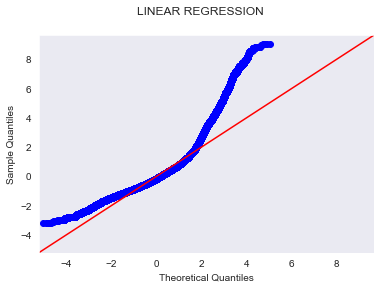

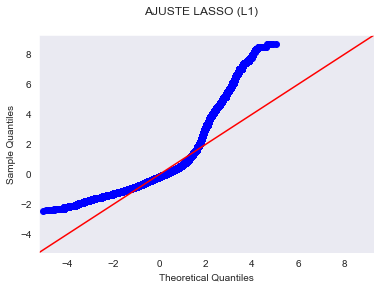

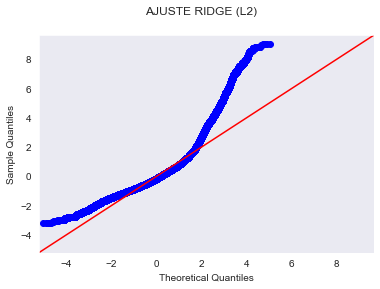

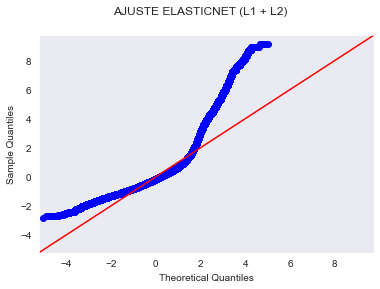

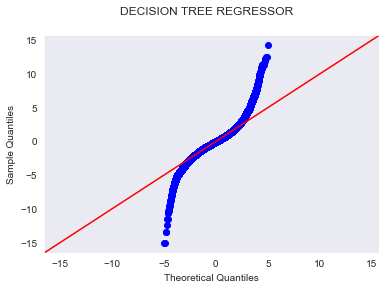

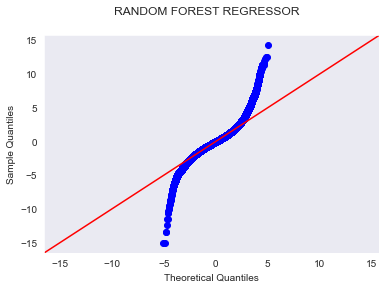

In [111]:
#-------------------------------------------------------------------------#
# DISTRIBUIÇÃO DE PROBABILIDADE DOS TERMOS DE ERRO (RESÍDUOS) DOS MODELOS #
#-------------------------------------------------------------------------#

#--------------------#
# Calculando resíduo #
#--------------------#

# Linear Regression
residuo_lr_etanol  = y_train_etanol - y_previsto_train_lr_etanol

# Lasso (L1)
residuo_lasso_etanol  = y_train_etanol - y_previsto_train_lasso_etanol

# Ridge (L2)
residuo_ridge_etanol  = y_train_etanol - y_previsto_train_ridge_etanol

# ElasticNet
residuo_elasticnet_etanol  = y_train_etanol - y_previsto_train_elasticnet_etanol

# Decision Tree Regressor
residuo_dt_etanol  = y_train_etanol - y_previsto_train_dt_etanol

# Random Forest Regressor
residuo_rf_etanol  = y_train_etanol - y_previsto_train_rf_etanol

#-------------------#
# Linear Regression #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_lr_etanol, dist = stats.norm, line = '45', fit = True)
figure.suptitle('LINEAR REGRESSION')
figure.show()

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_lasso_etanol, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE LASSO (L1)')
figure.show()

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_ridge_etanol, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE RIDGE (L2)')
figure.show()

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
figure = sm.graphics.qqplot(data = residuo_elasticnet_etanol, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE ELASTICNET (L1 + L2)')
figure.show()

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
figure = sm.graphics.qqplot(data = residuo_dt_etanol, dist = stats.norm, line = '45', fit = True)
figure.suptitle('DECISION TREE REGRESSOR')
figure.show()

#-------------------------#
# Random Forest Regressor #
#-------------------------#
figure = sm.graphics.qqplot(data = residuo_rf_etanol, dist = stats.norm, line = '45', fit = True)
figure.suptitle('RANDOM FOREST REGRESSOR')
figure.show()

### Diesel S10

In [ ]:
#---------------------#
# VARIÁVEL DEPENDENTE #
#---------------------#
y_diesel_s10 = df_diesel_s10['valor_venda']

In [ ]:
#-------------------------#
# VARIÁVEIS INDEPENDENTES #
#-------------------------#
x_diesel_s10 = df_diesel_s10[['uf', 'ano', 'mes']]

In [ ]:
#------------------------------------------------#
# DIVIDINDO DADOS EM CONJUNTOS DE TREINO E TESTE #
#------------------------------------------------#

# 70% PARA TREINO
# 30% PARA TESTE

x_train_diesel_s10, x_test_diesel_s10, y_train_diesel_s10, y_test_diesel_s10 = train_test_split(x_diesel_s10
                                                                                       ,y_diesel_s10
                                                                                       ,test_size = 0.3
                                                                                       ,random_state = 42)

In [ ]:
#----------------------#
# INSTANCIANDO MODELOS #
#----------------------#

# Linear Regression
modelo_lr_diesel_s10 = LinearRegression()

# Lasso (L1)
modelo_lasso_diesel_s10 = Lasso()

# Ridge (L2)
modelo_ridge_diesel_s10 = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_diesel_s10 = ElasticNet()

# Decision Tree Regressor
modelo_dt_diesel_s10 = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_diesel_s10 = RandomForestRegressor()

In [ ]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Linear Regression
modelo_lr_diesel_s10.fit(x_train_diesel_s10, y_train_diesel_s10)

# Lasso
modelo_lasso_diesel_s10.fit(x_train_diesel_s10, y_train_diesel_s10)

# Ridge
modelo_ridge_diesel_s10.fit(x_train_diesel_s10, y_train_diesel_s10)

# ElasticNet (L1 + L2)
modelo_elasticnet_diesel_s10.fit(x_train_diesel_s10, y_train_diesel_s10)

# Decision Tree Regressor
modelo_dt_diesel_s10.fit(x_train_diesel_s10, y_train_diesel_s10)

# Random Forest Regressor
modelo_rf_diesel_s10.fit(x_train_diesel_s10, y_train_diesel_s10)

In [117]:
#-------------------------------#
# MÉTRICAS PARA DADOS DE TREINO #
#-------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_train_lr_diesel_s10 = modelo_lr_diesel_s10.predict(x_train_diesel_s10)

# Lasso (L1)
y_previsto_train_lasso_diesel_s10 = modelo_lasso_diesel_s10.predict(x_train_diesel_s10)

# Ridge (L2)
y_previsto_train_ridge_diesel_s10 = modelo_ridge_diesel_s10.predict(x_train_diesel_s10)

# ElasticNet (L1 + L2)
y_previsto_train_elasticnet_diesel_s10 = modelo_elasticnet_diesel_s10.predict(x_train_diesel_s10)

# Decision Tree Regressor
y_previsto_train_dt_diesel_s10 = modelo_dt_diesel_s10.predict(x_train_diesel_s10)

# Random Forest Regressor
y_previsto_train_rf_diesel_s10 = modelo_rf_diesel_s10.predict(x_train_diesel_s10)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_train_lr_diesel_s10 = mean_absolute_error(y_train_diesel_s10, y_previsto_train_lr_diesel_s10)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lr_diesel_s10))

modelo_mse_train_lr_diesel_s10 = mean_squared_error(y_train_diesel_s10, y_previsto_train_lr_diesel_s10)
modelo_rmse_train_lr_diesel_s10 = math.sqrt(modelo_mse_train_lr_diesel_s10)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lr_diesel_s10))

modelo_r2_train_lr_diesel_s10 = modelo_lr_diesel_s10.score(x_train_diesel_s10, y_train_diesel_s10)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lr_diesel_s10))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_train_lasso_diesel_s10 = mean_absolute_error(y_train_diesel_s10, y_previsto_train_lasso_diesel_s10)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lasso_diesel_s10))

modelo_mse_train_lasso_diesel_s10 = mean_squared_error(y_train_diesel_s10, y_previsto_train_lasso_diesel_s10)
modelo_rmse_train_lasso_diesel_s10 = math.sqrt(modelo_mse_train_lasso_diesel_s10)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lasso_diesel_s10))

modelo_r2_train_lasso_diesel_s10 = modelo_lasso_diesel_s10.score(x_train_diesel_s10, y_train_diesel_s10)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lasso_diesel_s10))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_train_ridge_diesel_s10 = mean_absolute_error(y_train_diesel_s10, y_previsto_train_ridge_diesel_s10)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_ridge_diesel_s10))

modelo_mse_train_ridge_diesel_s10 = mean_squared_error(y_train_diesel_s10, y_previsto_train_ridge_diesel_s10)
modelo_rmse_train_ridge_diesel_s10 = math.sqrt(modelo_mse_train_ridge_diesel_s10)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_ridge_diesel_s10))

modelo_r2_train_ridge_diesel_s10 = modelo_ridge_diesel_s10.score(x_train_diesel_s10, y_train_diesel_s10)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_ridge_diesel_s10))

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_train_elasticnet_diesel_s10 = mean_absolute_error(y_train_diesel_s10, y_previsto_train_elasticnet_diesel_s10)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_elasticnet_diesel_s10))

modelo_mse_train_elasticnet_diesel_s10 = mean_squared_error(y_train_diesel_s10, y_previsto_train_elasticnet_diesel_s10)
modelo_rmse_train_elasticnet_diesel_s10 = math.sqrt(modelo_mse_train_elasticnet_diesel_s10)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_elasticnet_diesel_s10))

modelo_r2_train_elasticnet_diesel_s10 = modelo_elasticnet_diesel_s10.score(x_train_diesel_s10, y_train_diesel_s10)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_elasticnet_diesel_s10))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_dt_diesel_s10 = mean_absolute_error(y_train_diesel_s10, y_previsto_train_dt_diesel_s10)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_dt_diesel_s10))

modelo_mse_train_dt_diesel_s10 = mean_squared_error(y_train_diesel_s10, y_previsto_train_dt_diesel_s10)
modelo_rmse_train_dt_diesel_s10 = math.sqrt(modelo_mse_train_dt_diesel_s10)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_dt_diesel_s10))

modelo_r2_train_dt_diesel_s10 = modelo_dt_diesel_s10.score(x_train_diesel_s10, y_train_diesel_s10)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_dt_diesel_s10))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_rf_diesel_s10 = mean_absolute_error(y_train_diesel_s10, y_previsto_train_rf_diesel_s10)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_rf_diesel_s10))

modelo_mse_train_rf_diesel_s10 = mean_squared_error(y_train_diesel_s10, y_previsto_train_rf_diesel_s10)
modelo_rmse_train_rf_diesel_s10 = math.sqrt(modelo_mse_train_rf_diesel_s10)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_rf_diesel_s10))

modelo_r2_train_rf_diesel_s10 = modelo_rf_diesel_s10.score(x_train_diesel_s10, y_train_diesel_s10)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_rf_diesel_s10))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Treino = 0.26
RMSE Treino = 0.35
R²   Treino = 0.78
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Treino = 0.41
RMSE Treino = 0.57
R²   Treino = 0.42
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Treino = 0.26
RMSE Treino = 0.35
R²   Treino = 0.78
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Treino = 0.32
RMSE Treino = 0.45
R²   Treino = 0.64
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Treino = 0.11
RMSE Treino = 0.15
R²   Treino = 0.96
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Treino = 0.11
RMSE Treino = 0.15
R²   Treino = 0.96


In [118]:
#------------------------------#
# MÉTRICAS PARA DADOS DE TESTE #
#------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_test_lr_diesel_s10 = modelo_lr_diesel_s10.predict(x_test_diesel_s10)

# Lasso (L1)
y_previsto_test_lasso_diesel_s10 = modelo_lasso_diesel_s10.predict(x_test_diesel_s10)

# Ridge (L2)
y_previsto_test_ridge_diesel_s10 = modelo_ridge_diesel_s10.predict(x_test_diesel_s10)

# ElasticNet (L1 + L2)
y_previsto_test_elasticnet_diesel_s10 = modelo_elasticnet_diesel_s10.predict(x_test_diesel_s10)

# Decision Tree Regressor
y_previsto_test_dt_diesel_s10 = modelo_dt_diesel_s10.predict(x_test_diesel_s10)

# Random Forest Regressor
y_previsto_test_rf_diesel_s10 = modelo_rf_diesel_s10.predict(x_test_diesel_s10)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_test_lr_diesel_s10 = mean_absolute_error(y_test_diesel_s10, y_previsto_test_lr_diesel_s10)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lr_diesel_s10))

modelo_mse_test_lr_diesel_s10 = mean_squared_error(y_test_diesel_s10, y_previsto_test_lr_diesel_s10)
modelo_rmse_test_lr_diesel_s10 = math.sqrt(modelo_mse_test_lr_diesel_s10)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lr_diesel_s10))

modelo_r2_test_lr_diesel_s10 = modelo_lr_diesel_s10.score(x_test_diesel_s10, y_test_diesel_s10)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lr_diesel_s10))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_test_lasso_diesel_s10 = mean_absolute_error(y_test_diesel_s10, y_previsto_test_lasso_diesel_s10)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lasso_diesel_s10))

modelo_mse_test_lasso_diesel_s10 = mean_squared_error(y_test_diesel_s10, y_previsto_test_lasso_diesel_s10)
modelo_rmse_test_lasso_diesel_s10 = math.sqrt(modelo_mse_test_lasso_diesel_s10)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lasso_diesel_s10))

modelo_r2_test_lasso_diesel_s10 = modelo_lasso_diesel_s10.score(x_test_diesel_s10, y_test_diesel_s10)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lasso_diesel_s10))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_test_ridge_diesel_s10 = mean_absolute_error(y_test_diesel_s10, y_previsto_test_ridge_diesel_s10)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_ridge_diesel_s10))

modelo_mse_test_ridge_diesel_s10 = mean_squared_error(y_test_diesel_s10, y_previsto_test_ridge_diesel_s10)
modelo_rmse_test_ridge_diesel_s10 = math.sqrt(modelo_mse_test_ridge_diesel_s10)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_ridge_diesel_s10))

modelo_r2_test_ridge_diesel_s10 = modelo_ridge_diesel_s10.score(x_test_diesel_s10, y_test_diesel_s10)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_ridge_diesel_s10))

#-----------------------------#
# Ajuste ElastciNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_test_elasticnet_diesel_s10 = mean_absolute_error(y_test_diesel_s10, y_previsto_test_elasticnet_diesel_s10)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_elasticnet_diesel_s10))

modelo_mse_test_elasticnet_diesel_s10 = mean_squared_error(y_test_diesel_s10, y_previsto_test_elasticnet_diesel_s10)
modelo_rmse_test_elasticnet_diesel_s10 = math.sqrt(modelo_mse_test_elasticnet_diesel_s10)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_elasticnet_diesel_s10))

modelo_r2_test_elasticnet_diesel_s10 = modelo_elasticnet_diesel_s10.score(x_test_diesel_s10, y_test_diesel_s10)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_elasticnet_diesel_s10))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_dt_diesel_s10 = mean_absolute_error(y_test_diesel_s10, y_previsto_test_dt_diesel_s10)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_dt_diesel_s10))

modelo_mse_test_dt_diesel_s10 = mean_squared_error(y_test_diesel_s10, y_previsto_test_dt_diesel_s10)
modelo_rmse_test_dt_diesel_s10 = math.sqrt(modelo_mse_test_dt_diesel_s10)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_dt_diesel_s10))

modelo_r2_test_dt_diesel_s10 = modelo_dt_diesel_s10.score(x_test_diesel_s10, y_test_diesel_s10)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_dt_diesel_s10))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_rf_diesel_s10 = mean_absolute_error(y_test_diesel_s10, y_previsto_test_rf_diesel_s10)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_rf_diesel_s10))

modelo_mse_test_rf_diesel_s10 = mean_squared_error(y_test_diesel_s10, y_previsto_test_rf_diesel_s10)
modelo_rmse_test_rf_diesel_s10 = math.sqrt(modelo_mse_test_rf_diesel_s10)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_rf_diesel_s10))

modelo_r2_test_rf_diesel_s10 = modelo_rf_diesel_s10.score(x_test_diesel_s10, y_test_diesel_s10)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_rf_diesel_s10))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Teste = 0.26
RMSE Teste = 0.35
R²   Teste = 0.78
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Teste = 0.42
RMSE Teste = 0.57
R²   Teste = 0.42
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Teste = 0.26
RMSE Teste = 0.35
R²   Teste = 0.78
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Teste = 0.32
RMSE Teste = 0.45
R²   Teste = 0.64
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Teste = 0.11
RMSE Teste = 0.15
R²   Teste = 0.96
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Teste = 0.11
RMSE Teste = 0.15
R²   Teste = 0.96


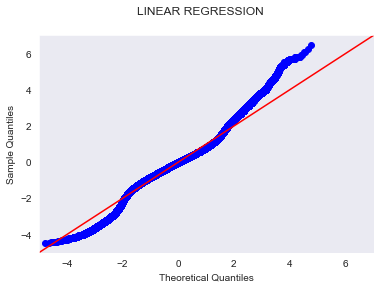

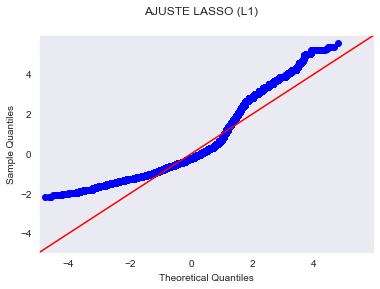

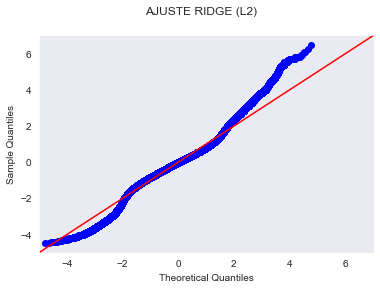

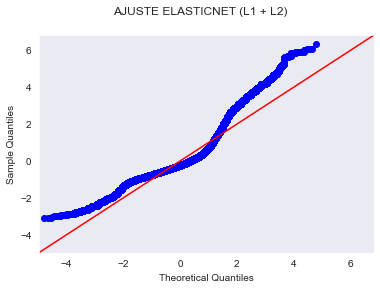

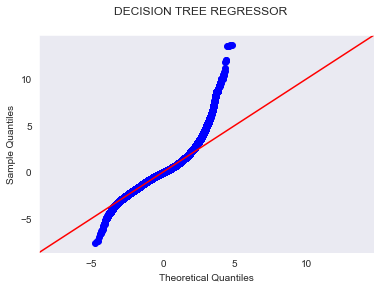

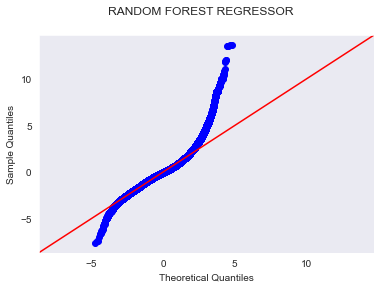

In [119]:
#-------------------------------------------------------------------------#
# DISTRIBUIÇÃO DE PROBABILIDADE DOS TERMOS DE ERRO (RESÍDUOS) DOS MODELOS #
#-------------------------------------------------------------------------#

#--------------------#
# Calculando resíduo #
#--------------------#

# Linear Regression
residuo_lr_diesel_s10  = y_train_diesel_s10 - y_previsto_train_lr_diesel_s10

# Lasso (L1)
residuo_lasso_diesel_s10  = y_train_diesel_s10 - y_previsto_train_lasso_diesel_s10

# Ridge (L2)
residuo_ridge_diesel_s10  = y_train_diesel_s10 - y_previsto_train_ridge_diesel_s10

# ElasticNet
residuo_elasticnet_diesel_s10  = y_train_diesel_s10 - y_previsto_train_elasticnet_diesel_s10

# Decision Tree Regressor
residuo_dt_diesel_s10  = y_train_diesel_s10 - y_previsto_train_dt_diesel_s10

# Random Forest Regressor
residuo_rf_diesel_s10  = y_train_diesel_s10 - y_previsto_train_rf_diesel_s10

#-------------------#
# Linear Regression #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_lr_diesel_s10, dist = stats.norm, line = '45', fit = True)
figure.suptitle('LINEAR REGRESSION')
figure.show()

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_lasso_diesel_s10, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE LASSO (L1)')
figure.show()

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_ridge_diesel_s10, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE RIDGE (L2)')
figure.show()

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
figure = sm.graphics.qqplot(data = residuo_elasticnet_diesel_s10, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE ELASTICNET (L1 + L2)')
figure.show()

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
figure = sm.graphics.qqplot(data = residuo_dt_diesel_s10, dist = stats.norm, line = '45', fit = True)
figure.suptitle('DECISION TREE REGRESSOR')
figure.show()

#-------------------------#
# Random Forest Regressor #
#-------------------------#
figure = sm.graphics.qqplot(data = residuo_rf_diesel_s10, dist = stats.norm, line = '45', fit = True)
figure.suptitle('RANDOM FOREST REGRESSOR')
figure.show()

### Diesel

In [ ]:
#---------------------#
# VARIÁVEL DEPENDENTE #
#---------------------#
y_diesel = df_diesel['valor_venda']

In [ ]:
#-------------------------#
# VARIÁVEIS INDEPENDENTES #
#-------------------------#
x_diesel = df_diesel[['uf', 'ano', 'mes']]

In [ ]:
#------------------------------------------------#
# DIVIDINDO DADOS EM CONJUNTOS DE TREINO E TESTE #
#------------------------------------------------#

# 70% PARA TREINO
# 30% PARA TESTE

x_train_diesel, x_test_diesel, y_train_diesel, y_test_diesel = train_test_split(x_diesel
                                                                                       ,y_diesel
                                                                                       ,test_size = 0.3
                                                                                       ,random_state = 42)

In [ ]:
#----------------------#
# INSTANCIANDO MODELOS #
#----------------------#

# Linear Regression
modelo_lr_diesel = LinearRegression()

# Lasso (L1)
modelo_lasso_diesel = Lasso()

# Ridge (L2)
modelo_ridge_diesel = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_diesel = ElasticNet()

# Decision Tree Regressor
modelo_dt_diesel = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_diesel = RandomForestRegressor()

In [ ]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Linear Regression
modelo_lr_diesel.fit(x_train_diesel, y_train_diesel)

# Lasso
modelo_lasso_diesel.fit(x_train_diesel, y_train_diesel)

# Ridge
modelo_ridge_diesel.fit(x_train_diesel, y_train_diesel)

# ElasticNet (L1 + L2)
modelo_elasticnet_diesel.fit(x_train_diesel, y_train_diesel)

# Decision Tree Regressor
modelo_dt_diesel.fit(x_train_diesel, y_train_diesel)

# Random Forest Regressor
modelo_rf_diesel.fit(x_train_diesel, y_train_diesel)

In [125]:
#-------------------------------#
# MÉTRICAS PARA DADOS DE TREINO #
#-------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_train_lr_diesel = modelo_lr_diesel.predict(x_train_diesel)

# Lasso (L1)
y_previsto_train_lasso_diesel = modelo_lasso_diesel.predict(x_train_diesel)

# Ridge (L2)
y_previsto_train_ridge_diesel = modelo_ridge_diesel.predict(x_train_diesel)

# ElasticNet (L1 + L2)
y_previsto_train_elasticnet_diesel = modelo_elasticnet_diesel.predict(x_train_diesel)

# Decision Tree Regressor
y_previsto_train_dt_diesel = modelo_dt_diesel.predict(x_train_diesel)

# Random Forest Regressor
y_previsto_train_rf_diesel = modelo_rf_diesel.predict(x_train_diesel)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_train_lr_diesel = mean_absolute_error(y_train_diesel, y_previsto_train_lr_diesel)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lr_diesel))

modelo_mse_train_lr_diesel = mean_squared_error(y_train_diesel, y_previsto_train_lr_diesel)
modelo_rmse_train_lr_diesel = math.sqrt(modelo_mse_train_lr_diesel)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lr_diesel))

modelo_r2_train_lr_diesel = modelo_lr_diesel.score(x_train_diesel, y_train_diesel)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lr_diesel))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_train_lasso_diesel = mean_absolute_error(y_train_diesel, y_previsto_train_lasso_diesel)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lasso_diesel))

modelo_mse_train_lasso_diesel = mean_squared_error(y_train_diesel, y_previsto_train_lasso_diesel)
modelo_rmse_train_lasso_diesel = math.sqrt(modelo_mse_train_lasso_diesel)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lasso_diesel))

modelo_r2_train_lasso_diesel = modelo_lasso_diesel.score(x_train_diesel, y_train_diesel)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lasso_diesel))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_train_ridge_diesel = mean_absolute_error(y_train_diesel, y_previsto_train_ridge_diesel)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_ridge_diesel))

modelo_mse_train_ridge_diesel = mean_squared_error(y_train_diesel, y_previsto_train_ridge_diesel)
modelo_rmse_train_ridge_diesel = math.sqrt(modelo_mse_train_ridge_diesel)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_ridge_diesel))

modelo_r2_train_ridge_diesel = modelo_ridge_diesel.score(x_train_diesel, y_train_diesel)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_ridge_diesel))

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_train_elasticnet_diesel = mean_absolute_error(y_train_diesel, y_previsto_train_elasticnet_diesel)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_elasticnet_diesel))

modelo_mse_train_elasticnet_diesel = mean_squared_error(y_train_diesel, y_previsto_train_elasticnet_diesel)
modelo_rmse_train_elasticnet_diesel = math.sqrt(modelo_mse_train_elasticnet_diesel)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_elasticnet_diesel))

modelo_r2_train_elasticnet_diesel = modelo_elasticnet_diesel.score(x_train_diesel, y_train_diesel)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_elasticnet_diesel))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_dt_diesel = mean_absolute_error(y_train_diesel, y_previsto_train_dt_diesel)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_dt_diesel))

modelo_mse_train_dt_diesel = mean_squared_error(y_train_diesel, y_previsto_train_dt_diesel)
modelo_rmse_train_dt_diesel = math.sqrt(modelo_mse_train_dt_diesel)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_dt_diesel))

modelo_r2_train_dt_diesel = modelo_dt_diesel.score(x_train_diesel, y_train_diesel)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_dt_diesel))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_rf_diesel = mean_absolute_error(y_train_diesel, y_previsto_train_rf_diesel)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_rf_diesel))

modelo_mse_train_rf_diesel = mean_squared_error(y_train_diesel, y_previsto_train_rf_diesel)
modelo_rmse_train_rf_diesel = math.sqrt(modelo_mse_train_rf_diesel)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_rf_diesel))

modelo_r2_train_rf_diesel = modelo_rf_diesel.score(x_train_diesel, y_train_diesel)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_rf_diesel))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Treino = 0.24
RMSE Treino = 0.32
R²   Treino = 0.80
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Treino = 0.25
RMSE Treino = 0.39
R²   Treino = 0.70
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Treino = 0.24
RMSE Treino = 0.32
R²   Treino = 0.80
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Treino = 0.23
RMSE Treino = 0.35
R²   Treino = 0.76
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Treino = 0.07
RMSE Treino = 0.09
R²   Treino = 0.98
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Treino = 0.07
RMSE Treino = 0.09
R²   Treino = 0.98


In [126]:
#------------------------------#
# MÉTRICAS PARA DADOS DE TESTE #
#------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_test_lr_diesel = modelo_lr_diesel.predict(x_test_diesel)

# Lasso (L1)
y_previsto_test_lasso_diesel = modelo_lasso_diesel.predict(x_test_diesel)

# Ridge (L2)
y_previsto_test_ridge_diesel = modelo_ridge_diesel.predict(x_test_diesel)

# ElasticNet (L1 + L2)
y_previsto_test_elasticnet_diesel = modelo_elasticnet_diesel.predict(x_test_diesel)

# Decision Tree Regressor
y_previsto_test_dt_diesel = modelo_dt_diesel.predict(x_test_diesel)

# Random Forest Regressor
y_previsto_test_rf_diesel = modelo_rf_diesel.predict(x_test_diesel)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_test_lr_diesel = mean_absolute_error(y_test_diesel, y_previsto_test_lr_diesel)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lr_diesel))

modelo_mse_test_lr_diesel = mean_squared_error(y_test_diesel, y_previsto_test_lr_diesel)
modelo_rmse_test_lr_diesel = math.sqrt(modelo_mse_test_lr_diesel)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lr_diesel))

modelo_r2_test_lr_diesel = modelo_lr_diesel.score(x_test_diesel, y_test_diesel)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lr_diesel))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_test_lasso_diesel = mean_absolute_error(y_test_diesel, y_previsto_test_lasso_diesel)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lasso_diesel))

modelo_mse_test_lasso_diesel = mean_squared_error(y_test_diesel, y_previsto_test_lasso_diesel)
modelo_rmse_test_lasso_diesel = math.sqrt(modelo_mse_test_lasso_diesel)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lasso_diesel))

modelo_r2_test_lasso_diesel = modelo_lasso_diesel.score(x_test_diesel, y_test_diesel)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lasso_diesel))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_test_ridge_diesel = mean_absolute_error(y_test_diesel, y_previsto_test_ridge_diesel)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_ridge_diesel))

modelo_mse_test_ridge_diesel = mean_squared_error(y_test_diesel, y_previsto_test_ridge_diesel)
modelo_rmse_test_ridge_diesel = math.sqrt(modelo_mse_test_ridge_diesel)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_ridge_diesel))

modelo_r2_test_ridge_diesel = modelo_ridge_diesel.score(x_test_diesel, y_test_diesel)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_ridge_diesel))

#-----------------------------#
# Ajuste ElastciNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_test_elasticnet_diesel = mean_absolute_error(y_test_diesel, y_previsto_test_elasticnet_diesel)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_elasticnet_diesel))

modelo_mse_test_elasticnet_diesel = mean_squared_error(y_test_diesel, y_previsto_test_elasticnet_diesel)
modelo_rmse_test_elasticnet_diesel = math.sqrt(modelo_mse_test_elasticnet_diesel)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_elasticnet_diesel))

modelo_r2_test_elasticnet_diesel = modelo_elasticnet_diesel.score(x_test_diesel, y_test_diesel)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_elasticnet_diesel))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_dt_diesel = mean_absolute_error(y_test_diesel, y_previsto_test_dt_diesel)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_dt_diesel))

modelo_mse_test_dt_diesel = mean_squared_error(y_test_diesel, y_previsto_test_dt_diesel)
modelo_rmse_test_dt_diesel = math.sqrt(modelo_mse_test_dt_diesel)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_dt_diesel))

modelo_r2_test_dt_diesel = modelo_dt_diesel.score(x_test_diesel, y_test_diesel)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_dt_diesel))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_rf_diesel = mean_absolute_error(y_test_diesel, y_previsto_test_rf_diesel)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_rf_diesel))

modelo_mse_test_rf_diesel = mean_squared_error(y_test_diesel, y_previsto_test_rf_diesel)
modelo_rmse_test_rf_diesel = math.sqrt(modelo_mse_test_rf_diesel)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_rf_diesel))

modelo_r2_test_rf_diesel = modelo_rf_diesel.score(x_test_diesel, y_test_diesel)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_rf_diesel))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Teste = 0.24
RMSE Teste = 0.32
R²   Teste = 0.80
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Teste = 0.25
RMSE Teste = 0.39
R²   Teste = 0.70
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Teste = 0.24
RMSE Teste = 0.32
R²   Teste = 0.80
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Teste = 0.23
RMSE Teste = 0.35
R²   Teste = 0.76
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Teste = 0.07
RMSE Teste = 0.09
R²   Teste = 0.98
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Teste = 0.07
RMSE Teste = 0.09
R²   Teste = 0.98


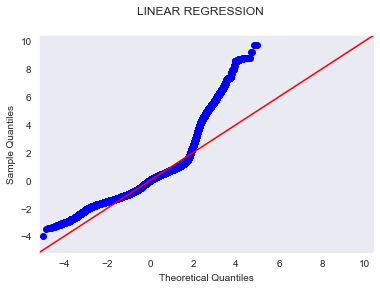

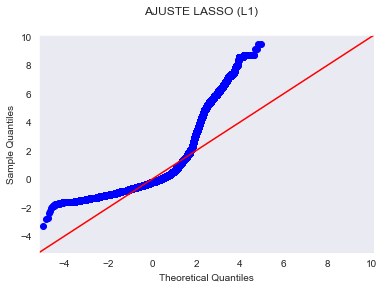

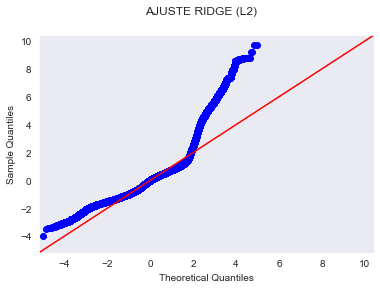

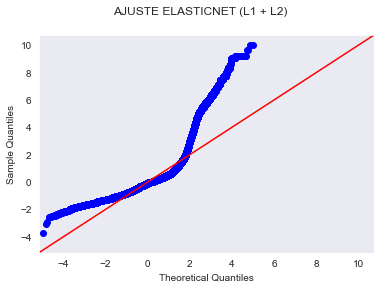

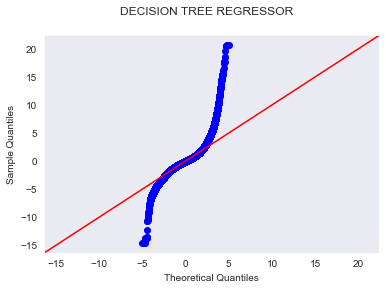

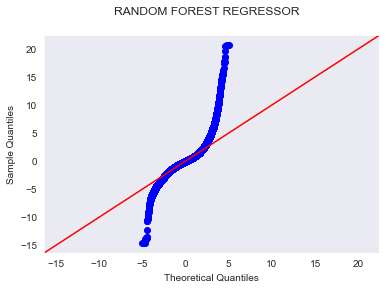

In [127]:
#-------------------------------------------------------------------------#
# DISTRIBUIÇÃO DE PROBABILIDADE DOS TERMOS DE ERRO (RESÍDUOS) DOS MODELOS #
#-------------------------------------------------------------------------#

#--------------------#
# Calculando resíduo #
#--------------------#

# Linear Regression
residuo_lr_diesel  = y_train_diesel - y_previsto_train_lr_diesel

# Lasso (L1)
residuo_lasso_diesel  = y_train_diesel - y_previsto_train_lasso_diesel

# Ridge (L2)
residuo_ridge_diesel  = y_train_diesel - y_previsto_train_ridge_diesel

# ElasticNet
residuo_elasticnet_diesel  = y_train_diesel - y_previsto_train_elasticnet_diesel

# Decision Tree Regressor
residuo_dt_diesel  = y_train_diesel - y_previsto_train_dt_diesel

# Random Forest Regressor
residuo_rf_diesel  = y_train_diesel - y_previsto_train_rf_diesel

#-------------------#
# Linear Regression #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_lr_diesel, dist = stats.norm, line = '45', fit = True)
figure.suptitle('LINEAR REGRESSION')
figure.show()

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_lasso_diesel, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE LASSO (L1)')
figure.show()

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_ridge_diesel, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE RIDGE (L2)')
figure.show()

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
figure = sm.graphics.qqplot(data = residuo_elasticnet_diesel, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE ELASTICNET (L1 + L2)')
figure.show()

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
figure = sm.graphics.qqplot(data = residuo_dt_diesel, dist = stats.norm, line = '45', fit = True)
figure.suptitle('DECISION TREE REGRESSOR')
figure.show()

#-------------------------#
# Random Forest Regressor #
#-------------------------#
figure = sm.graphics.qqplot(data = residuo_rf_diesel, dist = stats.norm, line = '45', fit = True)
figure.suptitle('RANDOM FOREST REGRESSOR')
figure.show()

### GNV

In [ ]:
#---------------------#
# VARIÁVEL DEPENDENTE #
#---------------------#
y_gnv = df_gnv['valor_venda']

In [ ]:
#-------------------------#
# VARIÁVEIS INDEPENDENTES #
#-------------------------#
x_gnv = df_gnv[['uf', 'ano', 'mes']]

In [ ]:
#------------------------------------------------#
# DIVIDINDO DADOS EM CONJUNTOS DE TREINO E TESTE #
#------------------------------------------------#

# 70% PARA TREINO
# 30% PARA TESTE

x_train_gnv, x_test_gnv, y_train_gnv, y_test_gnv = train_test_split(x_gnv
                                                                                       ,y_gnv
                                                                                       ,test_size = 0.3
                                                                                       ,random_state = 42)

In [ ]:
#----------------------#
# INSTANCIANDO MODELOS #
#----------------------#

# Linear Regression
modelo_lr_gnv = LinearRegression()

# Lasso (L1)
modelo_lasso_gnv = Lasso()

# Ridge (L2)
modelo_ridge_gnv = Ridge()

# ElasticNet (L1 + L2)
modelo_elasticnet_gnv = ElasticNet()

# Decision Tree Regressor
modelo_dt_gnv = DecisionTreeRegressor()

# Random Forest Regressor
modelo_rf_gnv = RandomForestRegressor()

In [ ]:
#-------------------#
# AJUSTANDO MODELOS #
#-------------------#

# Linear Regression
modelo_lr_gnv.fit(x_train_gnv, y_train_gnv)

# Lasso
modelo_lasso_gnv.fit(x_train_gnv, y_train_gnv)

# Ridge
modelo_ridge_gnv.fit(x_train_gnv, y_train_gnv)

# ElasticNet (L1 + L2)
modelo_elasticnet_gnv.fit(x_train_gnv, y_train_gnv)

# Decision Tree Regressor
modelo_dt_gnv.fit(x_train_gnv, y_train_gnv)

# Random Forest Regressor
modelo_rf_gnv.fit(x_train_gnv, y_train_gnv)

In [133]:
#-------------------------------#
# MÉTRICAS PARA DADOS DE TREINO #
#-------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_train_lr_gnv = modelo_lr_gnv.predict(x_train_gnv)

# Lasso (L1)
y_previsto_train_lasso_gnv = modelo_lasso_gnv.predict(x_train_gnv)

# Ridge (L2)
y_previsto_train_ridge_gnv = modelo_ridge_gnv.predict(x_train_gnv)

# ElasticNet (L1 + L2)
y_previsto_train_elasticnet_gnv = modelo_elasticnet_gnv.predict(x_train_gnv)

# Decision Tree Regressor
y_previsto_train_dt_gnv = modelo_dt_gnv.predict(x_train_gnv)

# Random Forest Regressor
y_previsto_train_rf_gnv = modelo_rf_gnv.predict(x_train_gnv)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_train_lr_gnv = mean_absolute_error(y_train_gnv, y_previsto_train_lr_gnv)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lr_gnv))

modelo_mse_train_lr_gnv = mean_squared_error(y_train_gnv, y_previsto_train_lr_gnv)
modelo_rmse_train_lr_gnv = math.sqrt(modelo_mse_train_lr_gnv)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lr_gnv))

modelo_r2_train_lr_gnv = modelo_lr_gnv.score(x_train_gnv, y_train_gnv)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lr_gnv))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_train_lasso_gnv = mean_absolute_error(y_train_gnv, y_previsto_train_lasso_gnv)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_lasso_gnv))

modelo_mse_train_lasso_gnv = mean_squared_error(y_train_gnv, y_previsto_train_lasso_gnv)
modelo_rmse_train_lasso_gnv = math.sqrt(modelo_mse_train_lasso_gnv)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_lasso_gnv))

modelo_r2_train_lasso_gnv = modelo_lasso_gnv.score(x_train_gnv, y_train_gnv)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_lasso_gnv))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_train_ridge_gnv = mean_absolute_error(y_train_gnv, y_previsto_train_ridge_gnv)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_ridge_gnv))

modelo_mse_train_ridge_gnv = mean_squared_error(y_train_gnv, y_previsto_train_ridge_gnv)
modelo_rmse_train_ridge_gnv = math.sqrt(modelo_mse_train_ridge_gnv)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_ridge_gnv))

modelo_r2_train_ridge_gnv = modelo_ridge_gnv.score(x_train_gnv, y_train_gnv)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_ridge_gnv))

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_train_elasticnet_gnv = mean_absolute_error(y_train_gnv, y_previsto_train_elasticnet_gnv)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_elasticnet_gnv))

modelo_mse_train_elasticnet_gnv = mean_squared_error(y_train_gnv, y_previsto_train_elasticnet_gnv)
modelo_rmse_train_elasticnet_gnv = math.sqrt(modelo_mse_train_elasticnet_gnv)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_elasticnet_gnv))

modelo_r2_train_elasticnet_gnv = modelo_elasticnet_gnv.score(x_train_gnv, y_train_gnv)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_elasticnet_gnv))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_dt_gnv = mean_absolute_error(y_train_gnv, y_previsto_train_dt_gnv)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_dt_gnv))

modelo_mse_train_dt_gnv = mean_squared_error(y_train_gnv, y_previsto_train_dt_gnv)
modelo_rmse_train_dt_gnv = math.sqrt(modelo_mse_train_dt_gnv)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_dt_gnv))

modelo_r2_train_dt_gnv = modelo_dt_gnv.score(x_train_gnv, y_train_gnv)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_dt_gnv))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_train_rf_gnv = mean_absolute_error(y_train_gnv, y_previsto_train_rf_gnv)
print('MAE  Treino = {0:.2f}'.format(modelo_mae_train_rf_gnv))

modelo_mse_train_rf_gnv = mean_squared_error(y_train_gnv, y_previsto_train_rf_gnv)
modelo_rmse_train_rf_gnv = math.sqrt(modelo_mse_train_rf_gnv)
print('RMSE Treino = {0:.2f}'.format(modelo_rmse_train_rf_gnv))

modelo_r2_train_rf_gnv = modelo_rf_gnv.score(x_train_gnv, y_train_gnv)
print('R²   Treino = {0:.2f}'.format(modelo_r2_train_rf_gnv))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Treino = 0.28
RMSE Treino = 0.37
R²   Treino = 0.78
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Treino = 0.29
RMSE Treino = 0.44
R²   Treino = 0.70
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Treino = 0.28
RMSE Treino = 0.37
R²   Treino = 0.78
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Treino = 0.27
RMSE Treino = 0.40
R²   Treino = 0.74
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Treino = 0.09
RMSE Treino = 0.15
R²   Treino = 0.97
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Treino = 0.09
RMSE Treino = 0.15
R²   Treino = 0.97


In [134]:
#------------------------------#
# MÉTRICAS PARA DADOS DE TESTE #
#------------------------------#

#-----------------------------#
# Definindo um valor previsto #
#-----------------------------#

# Linear Regression
y_previsto_test_lr_gnv = modelo_lr_gnv.predict(x_test_gnv)

# Lasso (L1)
y_previsto_test_lasso_gnv = modelo_lasso_gnv.predict(x_test_gnv)

# Ridge (L2)
y_previsto_test_ridge_gnv = modelo_ridge_gnv.predict(x_test_gnv)

# ElasticNet (L1 + L2)
y_previsto_test_elasticnet_gnv = modelo_elasticnet_gnv.predict(x_test_gnv)

# Decision Tree Regressor
y_previsto_test_dt_gnv = modelo_dt_gnv.predict(x_test_gnv)

# Random Forest Regressor
y_previsto_test_rf_gnv = modelo_rf_gnv.predict(x_test_gnv)

#---------------------#
# Calculando métricas #
#---------------------#

#-------------------#
# Linear Regression #
#-------------------#
print('---------------------------------')
print('--      LINEAR REGRESSION      --')
print('---------------------------------')

modelo_mae_test_lr_gnv = mean_absolute_error(y_test_gnv, y_previsto_test_lr_gnv)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lr_gnv))

modelo_mse_test_lr_gnv = mean_squared_error(y_test_gnv, y_previsto_test_lr_gnv)
modelo_rmse_test_lr_gnv = math.sqrt(modelo_mse_test_lr_gnv)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lr_gnv))

modelo_r2_test_lr_gnv = modelo_lr_gnv.score(x_test_gnv, y_test_gnv)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lr_gnv))

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE LASSO (L1)      --')
print('---------------------------------')

modelo_mae_test_lasso_gnv = mean_absolute_error(y_test_gnv, y_previsto_test_lasso_gnv)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_lasso_gnv))

modelo_mse_test_lasso_gnv = mean_squared_error(y_test_gnv, y_previsto_test_lasso_gnv)
modelo_rmse_test_lasso_gnv = math.sqrt(modelo_mse_test_lasso_gnv)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_lasso_gnv))

modelo_r2_test_lasso_gnv = modelo_lasso_gnv.score(x_test_gnv, y_test_gnv)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_lasso_gnv))

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
print('---------------------------------')
print('--      AJUSTE RIDGE (L2)      --')
print('---------------------------------')

modelo_mae_test_ridge_gnv = mean_absolute_error(y_test_gnv, y_previsto_test_ridge_gnv)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_ridge_gnv))

modelo_mse_test_ridge_gnv = mean_squared_error(y_test_gnv, y_previsto_test_ridge_gnv)
modelo_rmse_test_ridge_gnv = math.sqrt(modelo_mse_test_ridge_gnv)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_ridge_gnv))

modelo_r2_test_ridge_gnv = modelo_ridge_gnv.score(x_test_gnv, y_test_gnv)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_ridge_gnv))

#-----------------------------#
# Ajuste ElastciNet (L1 + L2) #
#-----------------------------#
print('---------------------------------')
print('-- AJUSTE ELASTICNET (L1 + L2) --')
print('---------------------------------')

modelo_mae_test_elasticnet_gnv = mean_absolute_error(y_test_gnv, y_previsto_test_elasticnet_gnv)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_elasticnet_gnv))

modelo_mse_test_elasticnet_gnv = mean_squared_error(y_test_gnv, y_previsto_test_elasticnet_gnv)
modelo_rmse_test_elasticnet_gnv = math.sqrt(modelo_mse_test_elasticnet_gnv)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_elasticnet_gnv))

modelo_r2_test_elasticnet_gnv = modelo_elasticnet_gnv.score(x_test_gnv, y_test_gnv)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_elasticnet_gnv))

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
print('---------------------------------')
print('--   DECISION TREE REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_dt_gnv = mean_absolute_error(y_test_gnv, y_previsto_test_dt_gnv)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_dt_gnv))

modelo_mse_test_dt_gnv = mean_squared_error(y_test_gnv, y_previsto_test_dt_gnv)
modelo_rmse_test_dt_gnv = math.sqrt(modelo_mse_test_dt_gnv)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_dt_gnv))

modelo_r2_test_dt_gnv = modelo_dt_gnv.score(x_test_gnv, y_test_gnv)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_dt_gnv))

#-------------------------#
# Random Forest Regressor #
#-------------------------#
print('---------------------------------')
print('--   RANDOM FOREST REGRESSOR   --')
print('---------------------------------')

modelo_mae_test_rf_gnv = mean_absolute_error(y_test_gnv, y_previsto_test_rf_gnv)
print('MAE  Teste = {0:.2f}'.format(modelo_mae_test_rf_gnv))

modelo_mse_test_rf_gnv = mean_squared_error(y_test_gnv, y_previsto_test_rf_gnv)
modelo_rmse_test_rf_gnv = math.sqrt(modelo_mse_test_rf_gnv)
print('RMSE Teste = {0:.2f}'.format(modelo_rmse_test_rf_gnv))

modelo_r2_test_rf_gnv = modelo_rf_gnv.score(x_test_gnv, y_test_gnv)
print('R²   Teste = {0:.2f}'.format(modelo_r2_test_rf_gnv))

---------------------------------
--      LINEAR REGRESSION      --
---------------------------------
MAE  Teste = 0.28
RMSE Teste = 0.37
R²   Teste = 0.78
---------------------------------
--      AJUSTE LASSO (L1)      --
---------------------------------
MAE  Teste = 0.29
RMSE Teste = 0.44
R²   Teste = 0.70
---------------------------------
--      AJUSTE RIDGE (L2)      --
---------------------------------
MAE  Teste = 0.28
RMSE Teste = 0.37
R²   Teste = 0.78
---------------------------------
-- AJUSTE ELASTICNET (L1 + L2) --
---------------------------------
MAE  Teste = 0.27
RMSE Teste = 0.40
R²   Teste = 0.75
---------------------------------
--   DECISION TREE REGRESSOR   --
---------------------------------
MAE  Teste = 0.09
RMSE Teste = 0.15
R²   Teste = 0.97
---------------------------------
--   RANDOM FOREST REGRESSOR   --
---------------------------------
MAE  Teste = 0.09
RMSE Teste = 0.15
R²   Teste = 0.97


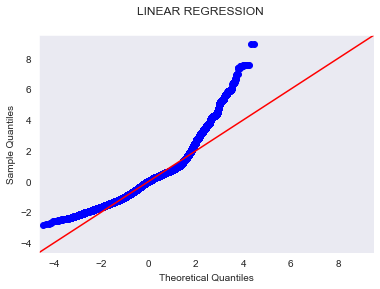

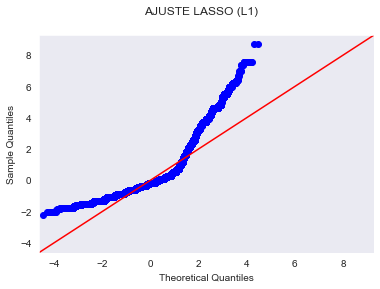

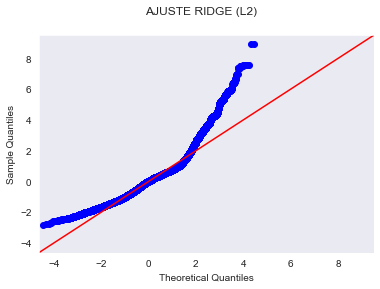

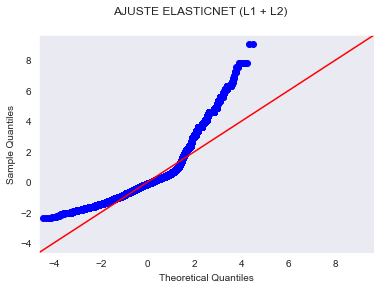

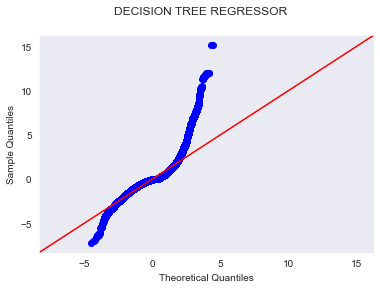

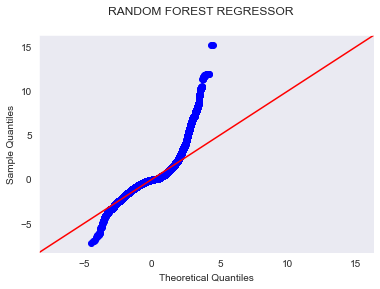

In [135]:
#-------------------------------------------------------------------------#
# DISTRIBUIÇÃO DE PROBABILIDADE DOS TERMOS DE ERRO (RESÍDUOS) DOS MODELOS #
#-------------------------------------------------------------------------#

#--------------------#
# Calculando resíduo #
#--------------------#

# Linear Regression
residuo_lr_gnv  = y_train_gnv - y_previsto_train_lr_gnv

# Lasso (L1)
residuo_lasso_gnv  = y_train_gnv - y_previsto_train_lasso_gnv

# Ridge (L2)
residuo_ridge_gnv  = y_train_gnv - y_previsto_train_ridge_gnv

# ElasticNet
residuo_elasticnet_gnv  = y_train_gnv - y_previsto_train_elasticnet_gnv

# Decision Tree Regressor
residuo_dt_gnv  = y_train_gnv - y_previsto_train_dt_gnv

# Random Forest Regressor
residuo_rf_gnv  = y_train_gnv - y_previsto_train_rf_gnv

#-------------------#
# Linear Regression #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_lr_gnv, dist = stats.norm, line = '45', fit = True)
figure.suptitle('LINEAR REGRESSION')
figure.show()

#-------------------#
# Ajuste Lasso (L1) #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_lasso_gnv, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE LASSO (L1)')
figure.show()

#-------------------#
# Ajuste Ridge (L2) #
#-------------------#
figure = sm.graphics.qqplot(data = residuo_ridge_gnv, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE RIDGE (L2)')
figure.show()

#-----------------------------#
# Ajuste ElasticNet (L1 + L2) #
#-----------------------------#
figure = sm.graphics.qqplot(data = residuo_elasticnet_gnv, dist = stats.norm, line = '45', fit = True)
figure.suptitle('AJUSTE ELASTICNET (L1 + L2)')
figure.show()

#-------------------------#
# Decision Tree Regressor #
#-------------------------#
figure = sm.graphics.qqplot(data = residuo_dt_gnv, dist = stats.norm, line = '45', fit = True)
figure.suptitle('DECISION TREE REGRESSOR')
figure.show()

#-------------------------#
# Random Forest Regressor #
#-------------------------#
figure = sm.graphics.qqplot(data = residuo_rf_gnv, dist = stats.norm, line = '45', fit = True)
figure.suptitle('RANDOM FOREST REGRESSOR')
figure.show()

### Tempo de execução do notebook

In [ ]:
# Finalizando contagem da duração dos downloads
end_time = datetime.now()

print('Tempo de execução do notebook: {}'.format(end_time - start_time))

# Tela para cálculo da previsão de preço de combustíveis

In [ ]:
#---------------------#
# Criando dicionários #
#---------------------#

dict_tipo_combustivel = {'Gasolina'          : 1
                        ,'Etanol'            : 2
                        ,'Diesel S10'        : 3
                        ,'Diesel'            : 4
                        ,'GNV'               : 5}

dict_mes = {'Janeiro'  : 1
           ,'Fevereiro': 2
           ,'Março'    : 3
           ,'Abril'    : 4
           ,'Maio'     : 5
           ,'Junho'    : 6
           ,'Julho'    : 7
           ,'Agosto'   : 8
           ,'Setembro' : 9
           ,'Outubro'  : 10
           ,'Novembro' : 11
           ,'Dezembro' : 12}

dict_estado = {'Acre'               : 1
              ,'Alagoas'            : 2
              ,'Amazonas'           : 3
              ,'Amapá'              : 4
              ,'Bahia'              : 5
              ,'Ceará'              : 6
              ,'Distrito Federal'   : 7
              ,'Espírito Santo'     : 8
              ,'Goiás'              : 9
              ,'Maranhão'           : 10
              ,'Minas Gerais'       : 11
              ,'Mato Grosso do Sul' : 12
              ,'Mato Grosso'        : 13
              ,'Pará'               : 14
              ,'Paraíba'            : 15
              ,'Pernambuco'         : 16
              ,'Piauí'              : 17
              ,'Paraná'             : 18
              ,'Rio de Janeiro'     : 19
              ,'Rio Grande do Norte': 20
              ,'Rondônia'           : 21
              ,'Roraima'            : 22
              ,'Rio Grande do Sul'  : 23
              ,'Santa Catarina'     : 24
              ,'Sergipe'            : 25
              ,'São Paulo'          : 26
              ,'Tocantins'          : 27}

dict_dataframes = {'Todo o conjunto de dados' : 1
                  ,'Por tipo de combustível'  : 2}

dict_algoritmos = {'Linear Regression'                       : 1
                  ,'Linear Regression - Lasso (L1)'          : 2
                  ,'Linear Regression - Ridge (L2)'          : 3
                  ,'Linear Regression - ElasticNet (L1 + L2)': 4
                  ,'Decision Tree Regressor'                 : 5
                  ,'Random Forest Regressor'                 : 6}

## Lógica para cálculo das previsões

In [ ]:
#-------------------------------------------------------------#
# Definindo range de anos que estarão disponíveis no combobox #
#-------------------------------------------------------------#
range_anos = list(range(2022, 2123))

#--------------------------------------------------------------------#
# Criando tela para seleção de dados e exibição da previsão de preço #
#--------------------------------------------------------------------#

class TelaRegressaoLinear():
    
    def __init__(self):
        
        #----------------#
        # Layout da tela #
        #----------------#
        
        layout = [
            
            # Texto informativo inicial
             [sg.Text('Selecione os dados desejados (todos são obrigatórios)')]
            
            # Label para combobox de dataframes
            ,[sg.Text('Dataframe: ')]
            
            # Lista de dataframes
            ,[sg.Combo(['Todo o conjunto de dados'
                       ,'Por tipo de combustível'], key = 'str_dataframes')]
            
            # Label para combobox de algoritmos
            ,[sg.Text('Algoritmo: ')]
            
            # Lista de algoritmos
            ,[sg.Combo(['Linear Regression'
                       ,'Linear Regression - Lasso (L1)'
                       ,'Linear Regression - Ridge (L2)'
                       ,'Linear Regression - ElasticNet (L1 + L2)'
                       ,'Decision Tree Regressor'
                       ,'Random Forest Regressor'], key = 'str_algoritmos')]
            
            # Label para combobox de Estados
            ,[sg.Text('Estado: ')]
            
            # Lista de Estados
            ,[sg.Combo(['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia'
                       ,'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás'
                       ,'Maranhão', 'Minas Gerais', 'Mato Grosso do Sul', 'Mato Grosso'
                       ,'Pará', 'Paraíba', 'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro'
                       ,'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Rio Grande do Sul'
                       , 'Santa Catarina','Sergipe', 'São Paulo', 'Tocantins'], key = 'str_estado')]
            
            # Label para combobox dos meses do ano
            ,[sg.Text('Mês: ')]
            
            # Lista dos meses do ano
            ,[sg.Combo(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho'
                       ,'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], key = 'str_mes')]
             
            # Label para combobox dos anos
            ,[sg.Text('Ano: ')]
            
            # Lista dos anos disponíveis
            ,[sg.Combo(str(range_anos).replace('[', '').replace(']', '').split(','), key = 'ano')]
            
            # Label para combobox dos tipos de combustíveis
            ,[sg.Text('Para qual tipo de combustível você deseja uma previsão de preço?')]
            
            # Lista dos tipos de combustíveis disponíveis
            ,[sg.Combo(['Gasolina'
                       ,'Etanol'
                       ,'Diesel S10'
                       ,'Diesel'
                       ,'GNV'], key = 'str_tipo_combustivel')]
            
            # Botões para calcular previsão de preço de combustível
            ,[sg.Button('Calcular', key = 'calcular')]
              
            # Configurando output das informações na tela
            ,[sg.Text('Dados da previsão de preço:')]
            ,[sg.Output(size = (43, 9), key = 'output')]
        
        ]
        
        #--------#
        # Janela #
        #--------#
        self.janela = sg.Window('Previsão de Preços de Combustíveis').layout(layout)
        
    #-----------------------------------------#
    # Tela para preenchimento das informações #
    #-----------------------------------------#
    
    def Iniciar(self):
        
        # Mantém a tela aberta
        while True:
            
            # Extrair dados da tela
            self.button, self.values = self.janela.Read()
                
            # Se o botão "Calcular" for clicado, serão exibidas na tela as informações selecionadas e o resultado da previsão
            if self.button == 'calcular':
                
                # Definindo dados de entrada para cálculo da previsão de preço de combustível
                
                # Strings
                str_algoritmos       = self.values['str_algoritmos']
                str_dataframes       = self.values['str_dataframes']
                str_estado           = self.values['str_estado']
                str_mes              = self.values['str_mes']
                str_tipo_combustivel = self.values['str_tipo_combustivel']
                
                # Valores para cálculo
                algoritmo        = dict_algoritmos[self.values['str_algoritmos']]
                dataframe        = dict_dataframes[self.values['str_dataframes']]
                estado           = dict_estado[self.values['str_estado']]
                mes              = dict_mes[self.values['str_mes']]
                ano              = int(self.values['ano'])
                tipo_combustivel = dict_tipo_combustivel[self.values['str_tipo_combustivel']]
                
                # Agrupando dados de entrada na variável
                dados_entrada_1 = [[estado, mes, ano, tipo_combustivel]]
                dados_entrada_2 = [[estado, mes, ano]]
                
                if dataframe == 1:
                    
                    if algoritmo == 1:
                        
                        # Executando cálculo
                        valor_previsto = modelo_lr.predict(dados_entrada_1).round(2)
                    
                        # Printando os valores selecionados e o cálculo na tela
                        print(f'Dados analisados: {str_dataframes}')
                        print(f'Algoritmo: {str_algoritmos}')
                        print(f'Estado: {str_estado}')
                        print(f'Mês/Ano: {str_mes} de {ano}')
                        print(f'Combustível: {str_tipo_combustivel}')
                        print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                    
                    elif algoritmo == 2:
                        
                        # Executando cálculo
                        valor_previsto = modelo_lasso.predict(dados_entrada_1).round(2)
                    
                        # Printando os valores selecionados e o cálculo na tela
                        print(f'Dados analisados: {str_dataframes}')
                        print(f'Algoritmo: {str_algoritmos}')
                        print(f'Estado: {str_estado}')
                        print(f'Mês/Ano: {str_mes} de {ano}')
                        print(f'Combustível: {str_tipo_combustivel}')
                        print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                    
                    elif algoritmo == 3:
                        
                        # Executando cálculo
                        valor_previsto = modelo_ridge.predict(dados_entrada_1).round(2)
                    
                        # Printando os valores selecionados e o cálculo na tela
                        print(f'Dados analisados: {str_dataframes}')
                        print(f'Algoritmo: {str_algoritmos}')
                        print(f'Estado: {str_estado}')
                        print(f'Mês/Ano: {str_mes} de {ano}')
                        print(f'Combustível: {str_tipo_combustivel}')
                        print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                        
                    elif algoritmo == 4:
                        
                        # Executando cálculo
                        valor_previsto = modelo_elasticnet.predict(dados_entrada_1).round(2)
                    
                        # Printando os valores selecionados e o cálculo na tela
                        print(f'Dados analisados: {str_dataframes}')
                        print(f'Algoritmo: {str_algoritmos}')
                        print(f'Estado: {str_estado}')
                        print(f'Mês/Ano: {str_mes} de {ano}')
                        print(f'Combustível: {str_tipo_combustivel}')
                        print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                    
                    elif algoritmo == 5:
                        
                        # Executando cálculo
                        valor_previsto = modelo_dt.predict(dados_entrada_1).round(2)
                    
                        # Printando os valores selecionados e o cálculo na tela
                        print(f'Dados analisados: {str_dataframes}')
                        print(f'Algoritmo: {str_algoritmos}')
                        print(f'Estado: {str_estado}')
                        print(f'Mês/Ano: {str_mes} de {ano}')
                        print(f'Combustível: {str_tipo_combustivel}')
                        print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                        
                    elif algoritmo == 6:
                        
                        # Executando cálculo
                        valor_previsto = modelo_rf.predict(dados_entrada_1).round(2)
                    
                        # Printando os valores selecionados e o cálculo na tela
                        print(f'Algoritmo: {str_algoritmos}')
                        print(f'Estado: {str_estado}')
                        print(f'Mês/Ano: {str_mes} de {ano}')
                        print(f'Combustível: {str_tipo_combustivel}')
                        print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                elif dataframe == 2:
                    
                    if algoritmo == 1:
                        
                        if tipo_combustivel == 1:
                    
                            # Executando cálculo
                            valor_previsto = modelo_lr_gasolina.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Gasolina')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 2:
                    
                            # Executando cálculo
                            valor_previsto = modelo_lr_etanol.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Etanol')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 3:
                    
                            # Executando cálculo
                            valor_previsto = modelo_lr_diesel_s10.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Diesel S10')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 4:
                    
                            # Executando cálculo
                            valor_previsto = modelo_lr_diesel.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Diesel')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 5:
                    
                            # Executando cálculo
                            valor_previsto = modelo_lr_gnv.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: GNV')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                    
                    elif algoritmo == 2:
                        
                        if tipo_combustivel == 1:
                    
                            # Executando cálculo
                            valor_previsto = modelo_lasso_gasolina.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Gasolina')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 2:
                    
                            # Executando cálculo
                            valor_previsto = modelo_lasso_etanol.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Etanol')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 3:
                    
                            # Executando cálculo
                            valor_previsto = modelo_lasso_diesel_s10.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Diesel S10')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 4:
                    
                            # Executando cálculo
                            valor_previsto = modelo_lasso_diesel.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Diesel')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 5:
                    
                            # Executando cálculo
                            valor_previsto = modelo_lasso_gnv.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: GNV')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                    
                    elif algoritmo == 3:
                        
                        if tipo_combustivel == 1:
                    
                            # Executando cálculo
                            valor_previsto = modelo_ridge_gasolina.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Gasolina')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 2:
                    
                            # Executando cálculo
                            valor_previsto = modelo_ridge_etanol.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Etanol')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 3:
                    
                            # Executando cálculo
                            valor_previsto = modelo_ridge_diesel_s10.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Diesel S10')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 4:
                    
                            # Executando cálculo
                            valor_previsto = modelo_ridge_diesel.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Diesel')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 5:
                    
                            # Executando cálculo
                            valor_previsto = modelo_ridge_gnv.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: GNV')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                    
                    elif algoritmo == 4:
                        
                        if tipo_combustivel == 1:
                    
                            # Executando cálculo
                            valor_previsto = modelo_elasticnet_gasolina.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Gasolina')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 2:
                    
                            # Executando cálculo
                            valor_previsto = modelo_elasticnet_etanol.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Etanol')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 3:
                    
                            # Executando cálculo
                            valor_previsto = modelo_elasticnet_diesel_s10.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Diesel S10')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 4:
                    
                            # Executando cálculo
                            valor_previsto = modelo_elasticnet_diesel.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Diesel')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 5:
                    
                            # Executando cálculo
                            valor_previsto = modelo_elasticnet_gnv.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: GNV')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                    
                    elif algoritmo == 5:
                        
                        if tipo_combustivel == 1:
                    
                            # Executando cálculo
                            valor_previsto = modelo_dt_gasolina.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Gasolina')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 2:
                    
                            # Executando cálculo
                            valor_previsto = modelo_dt_etanol.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Etanol')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 3:
                    
                            # Executando cálculo
                            valor_previsto = modelo_dt_diesel_s10.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Diesel S10')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 4:
                    
                            # Executando cálculo
                            valor_previsto = modelo_dt_diesel.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Diesel')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 5:
                    
                            # Executando cálculo
                            valor_previsto = modelo_dt_gnv.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: GNV')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                        
                    elif algoritmo == 6:
                        
                        if tipo_combustivel == 1:
                    
                            # Executando cálculo
                            valor_previsto = modelo_rf_gasolina.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Gasolina')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 2:
                    
                            # Executando cálculo
                            valor_previsto = modelo_rf_etanol.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Etanol')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 3:
                    
                            # Executando cálculo
                            valor_previsto = modelo_rf_diesel_s10.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Diesel S10')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 4:
                    
                            # Executando cálculo
                            valor_previsto = modelo_rf_diesel.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: Diesel')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
                
                        elif tipo_combustivel == 5:
                    
                            # Executando cálculo
                            valor_previsto = modelo_rf_gnv.predict(dados_entrada_2).round(2)
                            
                            # Printando os valores selecionados e o cálculo na tela
                            print(f'Dados analisados: Tipo de combustível específico')
                            print(f'Algoritmo: {str_algoritmos}')
                            print(f'Estado: {str_estado}')
                            print(f'Mês/Ano: {str_mes} de {ano}')
                            print(f'Combustível: GNV')
                            print(f'Valor previsto: R$ {float(valor_previsto)} \n')
            
            # Se o botão de "fechar" for clicado, o loop será interrompido e a tela será fechada
            if self.button == sg.WINDOW_CLOSED:
                break

In [ ]:
tela = TelaRegressaoLinear()
tela.Iniciar()